# FIT5196 Assesment 2
#### Student Name: Arushi Tejpal
#### Student ID: 28130006
Date: 22/08/2020
Version: 0.1 
Envrionment: Python 3.6.0 Anaconda 

*Libraries used:*
* Pandas
* Numpy 
* Sklearn.linear.model 
* matplotlib 
* seaborn 
* nltk 
* scipy.stats


## 1. Introduction 
For this Assignment I will code to analyze the dataset that is given,
find and fix the problems in the data. 
The data set given is: 
28130006_dirty_data.csv
28130006_missing_data.csv
28130006_outlier_data.csv

I have devided this assignment into three sections which will analyse the dirty_data, missing_data and outlier_data.


● Detect and fix errors in 28130006_dirty_data.csv

● Detect and remove outlier rows in 28130006_outlier_data.csv

● Impute the missing values in 2813006_missing_data.csv


I will provide an output file for all three sections. 


The data given contains the following variables: 

* <font color="blue">order_id</font>: A unique identifier for each order.
* <font color="blue">customer_id</font>: A unique identifier for each customer.
* <font color="blue">date</font>: The order the date was given by: YYYY-MM-DD format.
* <font color="blue">nearest_warehouse</font>: A string denoting the name of nearest warehouse to the customer.
* <font color="blue">shopping_cart</font>: A list of tuples representing the order items, along with the quantity of items. 
* <font color="blue">order_price</font>: A float denoting the order price in AUD. 
* <font color="blue">customer_lat</font>: Latitude of customer location.
* <font color="blue">customer_long</font>: Longitude of customer location. 
* <font color="blue">coupon_discount</font>: Integer denoting the percentage discount- applied to order_price. 
* <font color="blue">distance_to_nearest_warehouse</font>: A float representing arc distance in km. 
* <font color="blue">deliver_charges</font>: A float denoting the delivery charges
* <font color="blue">order_total</font>: A fload denoting the total of the order_total 
* <font color="blue">season</font>: A string denoting the season in which the order was placed. 
* <font color="blue">is_expedited_deliver</font>: A boolean denoting weather the customer has requested express delivery. 
* <font color="blue">latest_customer_review</font>: A string representing customer review of order.
* <font color="blue">is_happy_customer</font>: A boolean denoting if customer is happy or had issue with order.

NOTE:
The following attributes are always correct: 
* delivery_charges
* coupon_discount 
* quantity of item in shopping_cart

We wil also consider that there can only be one anomoly in one row. 



## Table of contents: 


#### Dirty Data
* [section 1.1](#sec1) Importing Libraries 

    * [section 1.2](#sec1.2) Data analysis
    * [section 1.3](#sec1.3) Identify Syntactical Anomalies
    * [section 1.4](#sec1.4) Fixing warehouse_name and season name 
    * [section 1.5](#sec1.5) Fixing Date
    * [section 1.6](#sec1.6) Fixing customer_lat/long
    * [section 1.7](#sec1.7) Fixing warehouse location 
    * [section 1.8](#sec1.8) Fixing sentiment errors
    * [section 1.9](#sec1.9)  Checking order_price/ order_total
    * [section 1.10](#sec1.10) Fixing shopping_cart 
    * [section 1.11](#sec1.11) saved file **dirty_data_solution.csv**
  
  

#### Missing data
* [section 2.1](#sec2.1) Missing Values
 
    * [section 2.2](#sec2.2) Creating copy df
    * [section 2.3](#sec2.3)  Imputing delivery_charges
    * [section 2.4](#sec2.4)  Imputing order_price ordery_total
    * [section 2.5](#sec2.5)  Imputing nearest_warehouse
    * [section 2.6](#sec2.6)  Fixing is_customer_happy
    * [section 2.7](#sec2.7)  Saving the file as **missing_solution.csv**
    * [section 2.8](#sec2.8)  Linear model  
    * [section 2.9](#sec2.9)  Plotting linear model
    
#### Outliers
* [section 3.1](#sec3.1) Outlier data 
    
    * [section 3.2](#sec3.2) EDA with visualisation 
    * [section 3.3](#sec3.3)  Investigating outlier with histogram
    * [section 3.4](#sec3.4)  Detecting outlier using scatterplot
    * [section 3.5](#sec3.5)  Detecting outlier using boxplot
    * [section 3.6](#sec3.6) Groupby analysis
    * [section 3.7](#sec3.7)  Removing outliers
    * [section 3.8](#sec3.8) Saved File **outlier_solution.csv**

  
    

### 1.1 IMPORTING LIBRARY FOR TASK 1  <a class="anchor" id="sec1.1"></a> 

In [451]:
#Basic scientific python libs
import pandas as pd
import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )

## First, load the dirty_data.csv 

In [452]:
dirty = pd.read_csv("28130006_dirty_data.csv")

## Data analysis 1.2  <a class="anchor" id="sec1.2"></a> 
* We can see our df has 500 rows and 16 columns 
* Dirty.info shows the data type of the columns 

* By using the function dirty.info() we are able to identify that the date column is written as an object data type, which should be corrected. 

* We will use this information to correct later on in the process. 


In [453]:
######Check the data information on the DataFrame from CSV file#############
print (dirty.shape)
print(dirty.info())
dirty.head()

(500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-n

order_id   customer_id        date nearest_warehouse  \
0  ORD368584  ID0356090889  2019-11-17            Bakers   
1  ORD262856  ID0591427992  2019-08-02         Nickolson   
2  ORD055366  ID0541122881  2019-12-27         nickolson   
3  ORD209330  ID0441031500  2019-02-26          Thompson   
4  ORD029311  ID0844475791  2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0            103.86    -37.818203     144.995857               10   
1             58.41    144.962550     -37.818875               15   
2             82.98    -37.804381     145.013385               25   
3             92.04    -37.813226     144.938394               15   
4             66.79    144.947493     -37.822482               25   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0      2452.86  Spring                   True                         0.9152   
1     13917.66  Winter                   True                         0.6164   
2     10957.98  Summer                  False                         1.7146   
3      5689.29  Summer                   True                         0.7654   
4     10188.04  Winter                  False                         1.0925   

                              latest_customer_review  is_happy_customer  
0                                               None               True  
1  junk the first phone in with a day boot log er...              False  
2  best smart phone ever! this is a great phone. ...               True  
3                            works great great phone               True  
4  great buy. i have bought digico refurb product...               True

In [454]:
dirty.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    500.000000         500.00000    500.000000     500.000000   
mean   14448.470000          77.66190    -27.942312     135.095560   
std     8092.379435          14.55888     41.352272      41.352197   
min      730.000000          45.30000    -37.831769     -37.834322   
25%     7950.000000          67.04000    -37.818288     144.948206   
50%    13455.000000          77.00000    -37.811936     144.961348   
75%    20095.000000          85.09000    -37.804502     144.980349   
max    39330.000000         130.79000    145.013608     145.016633   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       500.000000    500.000000                     500.000000  
mean         10.930000  12717.931120                       1.082099  
std           8.731413   7399.970496                       0.519715  
min           0.000000    699.380000                       0.063100  
25%           5.000000   6669.432500                       0.714125  
50%          10.000000  11734.940000                       1.077250  
75%          15.000000  17839.525000                       1.423775  
max          25.000000  37426.080000                       4.402800

The dirty.describe() function is able to tell us that: 
* The total orders placed are 500.
* The coupon_discount is between 0 to 25 going up in increments of 5. 

In [455]:
dirty.describe(include=['O'])


order_id   customer_id        date nearest_warehouse  \
count         500           500         500               500   
unique        500           490         297                 6   
top     ORD175233  ID0287629259  2019-06-16          Thompson   
freq            1             2           5               212   

                                    shopping_cart  season  \
count                                         500     500   
unique                                        474       8   
top     [('iAssist Line', 2), ('Olivia x460', 2)]  Summer   
freq                                            4     131   

                                   latest_customer_review  
count                                                 500  
unique                                                500  
top     i was amazed at how nice the phone was looks b...  
freq                                                    1

*The describe function above tells us:* 
* There are 10 customer_id's which are not unique. which can be checked by: dirty[((dirty.duplicated(['customer_id'],keep=False)))].count() command showing 20 duplicated values 

* It is mentioned that there are 6 nearest_warehouse locations, when there is only meant to be 3, needs to be checked further. 

* It is also menntuoned that there are 8 seasons when there is only 4. This needs to be checked further. 




In [456]:
dirty[((dirty.duplicated(['customer_id'],keep=False)))].count()

order_id                         20
customer_id                      20
date                             20
nearest_warehouse                20
shopping_cart                    20
order_price                      20
delivery_charges                 20
customer_lat                     20
customer_long                    20
coupon_discount                  20
order_total                      20
season                           20
is_expedited_delivery            20
distance_to_nearest_warehouse    20
latest_customer_review           20
is_happy_customer                20
dtype: int64

 Because the describe object function we are unable to see booleen columns: 
 * is_happy_customer column shows  there are 126 False and 374 True.
 * is_expedited_delivery column shows the True 252 False 248 values. 
 

In [457]:
dirty.is_happy_customer.value_counts()

True     374
False    126
Name: is_happy_customer, dtype: int64

In [458]:
dirty.is_expedited_delivery.value_counts()

True     252
False    248
Name: is_expedited_delivery, dtype: int64

## Create Column "Fixed" to Track Errors 

* To track the fixed rows, we will make new columns called "Fixed". 
* This will help us identify which rows are fixed and which rows are not fixed as there can only be one anomoly in each row. 

In [459]:
####Before we start lets create a Column to track all Errors
dirty['Fixed'] = pd.Series([False, False]).all()

* Because no rows have been fixed at the moment there are 500 rows (all rows) which are False. 

In [460]:
dirty.Fixed.value_counts() 

False    500
Name: Fixed, dtype: int64

# Identify Syntactical Anomalies 1.3 <a class="anchor" id="sec1.3"></a> 
* First we will fix case sensitve errors. 

As mentioned previously there are 6 values shown for nearest_warehouse and there should only be 3. This is due to a case error. 

* Using value counts we can confirm and identify which values are lowercase. 
* In total there are 24 nearest_warehouse names that are incorrect due to case error

In [461]:
dirty.nearest_warehouse.value_counts() # 24 nearest_warehouse names are lower cases

Thompson     212
Nickolson    156
Bakers       108
bakers         9
thompson       9
nickolson      6
Name: nearest_warehouse, dtype: int64

The same process is dont for seasons. 
* 8 season are counted previously. 
* Using value_counts we can identify confirm and see which seasons are lower case. 
* in total there are 23 seasons what are incorrect due to case error

In [462]:
dirty.season.value_counts() # 23 seasons names are lower cases

Summer    131
Winter    125
Spring    119
Autumn    102
spring      8
autumn      7
winter      4
summer      4
Name: season, dtype: int64

We are updating fixed/tracking column where warehouse names and the seasons name are incorrect/ lowercase. 

In [463]:
array_w=["bakers","nickolson","thompson"]
array_s=["winter","autumn","summer","spring"]
###to track season and warehouse errors fix the the main "Fixed" Column

dirty['Fixed'] = np.where(dirty["nearest_warehouse"].isin(array_w), True,
                         (np.where(dirty["season"].isin(array_s), True, dirty['Fixed'])))

We can see there are 24 rows that have been to fixed for nearest warehouse 

We can see there are 23 rows that have been to fixed for seasons

In [464]:
print(dirty.shape)     #Three more column added total shape value should be (500, 17)
dirty.Fixed.value_counts() 

(500, 17)


False    453
True      47
Name: Fixed, dtype: int64

## Fix nearest_warehouse/ season name 1.4 <a class="anchor" id="sec1.4"></a> 

* To fix lower case error we will use .replace function 
* To double check if the replace function we worked we will use value_counts() see the number of nearest_warehouse's 
* There are 3 different warehouses which confirms the replace function has worked. 


In [465]:
dirty.nearest_warehouse.replace({'thompson':'Thompson','nickolson':'Nickolson', 'bakers':'Bakers'},inplace=True)
dirty.nearest_warehouse.value_counts() 

Thompson     221
Nickolson    162
Bakers       117
Name: nearest_warehouse, dtype: int64

### Fix Season names
The same logic is used with the season column 
* Use replace to replace lower case rows with capitalisation of the word. 
* Use Value counts to see what seasons are there and if the replace function worked 
* There are 4 seasons which is correct. 

In [466]:
dirty.season.replace({'spring':'Spring','autumn':'Autumn', 'summer':'Summer','winter':'Winter'},inplace=True)
dirty.season.value_counts()

Summer    135
Winter    129
Spring    127
Autumn    109
Name: season, dtype: int64

In [467]:
dirty.Fixed.value_counts() ###To confirm that Tracking coulmn has 47 True (24+23) for season and Warehouse errors fixes

False    453
True      47
Name: Fixed, dtype: int64

# Fix Dates 1.5 <a class="anchor" id="sec1.5"></a> 
    * create a seperate Dataframe to sort out Dates.
    * Use lambda to split year month and day into seperate columns 
    

In [468]:
date_change = dirty['date'].apply(lambda s: pd.Series({'year':s.split('-')[0].strip(), 'month':s.split('-')[1].strip(), 
                                                      'day': s.split('-')[2]}))
date_change

year month day
0    2019    11  17
1    2019    08  02
2    2019    12  27
3    2019    02  26
4    2019    06  03
..    ...   ...  ..
495  2019    03  19
496  2019    07  08
497  2019    01  15
498  2019    05  09
499  2019    10  19

[500 rows x 3 columns]

Checking the data type for each column: year, month and day : they are all integer 

In [469]:
date_change['month']=date_change['month'].astype(str).astype(int)
date_change['year']=date_change['year'].astype(str).astype(int)
date_change['day']=date_change['day'].astype(str).astype(int)
date_change.dtypes

year     int64
month    int64
day      int64
dtype: object

We know that the date given in our dataframe has to be in the year 2019, therefore we can make a formula which extracts date that are NOT in the year 2019.  
* From this formula we can see that 10 rows are wrong 

In [470]:
date_change[(date_change.year!=2019)].count() ## 10 rows are wrong with Year

year     10
month    10
day      10
dtype: int64

We know that month cannot be greather than 12. 
* We can find incorrect month by ones that is greater than 12. 
* There are 17 rows which have a wrong month 

In [471]:
date_change[(date_change['month'] >12)].count()## 17 rows are wrong with Months

year     17
month    17
day      17
dtype: int64

To track these errors we will make another column called Fixed_date 
* There are 27 errors for date 


In [472]:
#####Tracking errors for dates
date_change['Fixed_date'] = np.where(date_change.year!=2019, True,
                         (np.where(date_change['month'] >12, True, False)))

date_change.Fixed_date.value_counts()

False    473
True      27
Name: Fixed_date, dtype: int64

* To fix the date we need to swap the values 
* Where the year is wrong we swap to the day column 
* Where the month is wrong we swap with the day column 

In [473]:
######Swapping values from day to year and month to days where wrong!!!!
date_change.loc[(date_change.year!=2019), ['year', 'day']] = (date_change.loc[(date_change.year!=2019), ['day', 'year']].values)
date_change.loc[(date_change.month>12), ['month', 'day']] = (date_change.loc[(date_change.month>12), ['day', 'month']].values)
date_change.head()
date_change.dtypes

year          int64
month         int64
day           int64
Fixed_date     bool
dtype: object

In [474]:
date_change.Fixed_date.value_counts() ###Should be 27 True Values

False    473
True      27
Name: Fixed_date, dtype: int64

We can combine all the columns to be named Correct_date 
* This correct_date column has the corrected values for our dates. 

In [475]:
#####create a coulmn with proper Format of Date by combining the Values
date_change["Correct_date"] = pd.to_datetime(date_change[['year', 'month', 'day']])
date_change

year  month  day  Fixed_date Correct_date
0    2019     11   17       False   2019-11-17
1    2019      8    2       False   2019-08-02
2    2019     12   27       False   2019-12-27
3    2019      2   26       False   2019-02-26
4    2019      6    3       False   2019-06-03
..    ...    ...  ...         ...          ...
495  2019      3   19       False   2019-03-19
496  2019      7    8       False   2019-07-08
497  2019      1   15       False   2019-01-15
498  2019      5    9       False   2019-05-09
499  2019     10   19       False   2019-10-19

[500 rows x 5 columns]

We can now add this column into the Dataframe 

In [476]:
####take the required coulmns back to main DataFrame
dirty = pd.concat([dirty, date_change.Correct_date,date_change.Fixed_date,date_change.month], axis=1)

In [477]:
dirty.shape

(500, 20)

In [478]:
dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    object        
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [479]:
dirty['date']=dirty['Correct_date'] #####swap the Org date column with fixed Date column

In [480]:
dirty.drop(columns=['Correct_date'], inplace=True)
dirty.head()

order_id   customer_id       date nearest_warehouse  \
0  ORD368584  ID0356090889 2019-11-17            Bakers   
1  ORD262856  ID0591427992 2019-08-02         Nickolson   
2  ORD055366  ID0541122881 2019-12-27         Nickolson   
3  ORD209330  ID0441031500 2019-02-26          Thompson   
4  ORD029311  ID0844475791 2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0            103.86    -37.818203     144.995857               10   
1             58.41    144.962550     -37.818875               15   
2             82.98    -37.804381     145.013385               25   
3             92.04    -37.813226     144.938394               15   
4             66.79    144.947493     -37.822482               25   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0      2452.86  Spring                   True                         0.9152   
1     13917.66  Winter                   True                         0.6164   
2     10957.98  Summer                  False                         1.7146   
3      5689.29  Summer                   True                         0.7654   
4     10188.04  Winter                  False                         1.0925   

                              latest_customer_review  is_happy_customer  \
0                                               None               True   
1  junk the first phone in with a day boot log er...              False   
2  best smart phone ever! this is a great phone. ...               True   
3                            works great great phone               True   
4  great buy. i have bought digico refurb product...               True   

   Fixed  Fixed_date  month  
0  False       False     11  
1  False       False      8  
2   True       False     12  
3  False       False      2  
4  False       False      6

* Updating fixed column whereever the date has been fixed by fixed_date column 

In [481]:
dirty['Fixed'] = np.where((dirty['Fixed_date'] == True), 
                           dirty['Fixed_date'],     
                           dirty['Fixed'])      


In [482]:
dirty.Fixed.value_counts() #####This should be 74 now including the 27 dates errors being fixed on 47

False    426
True      74
Name: Fixed, dtype: int64

In [483]:
dirty.dtypes #####just confirm extra columns added Fixed, Fixed_date,month 

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
Fixed                                      bool
Fixed_date                                 bool
month                                     int64
dtype: object

# Fixing Customer_lat, Customer_long 1.6  <a class="anchor" id="sec1.6"></a> 

 The customner latitude cannot be greater than 140 
 * Therefore there are 27 errors found using the formula below 

In [484]:
dirty[dirty.customer_lat>140.0].count() ####27 errors for Coustomer lat

order_id                         27
customer_id                      27
date                             27
nearest_warehouse                27
shopping_cart                    27
order_price                      27
delivery_charges                 27
customer_lat                     27
customer_long                    27
coupon_discount                  27
order_total                      27
season                           27
is_expedited_delivery            27
distance_to_nearest_warehouse    27
latest_customer_review           27
is_happy_customer                27
Fixed                            27
Fixed_date                       27
month                            27
dtype: int64

In [485]:
####update the tracker
dirty['Fixed'] = np.where((dirty['customer_lat'] > 140),True,dirty['Fixed'])

In [486]:
dirty.Fixed.value_counts() ##This should be 101 now as 27 added for customer_lat and long swap

False    399
True     101
Name: Fixed, dtype: int64

#### Swapping latitude to longitude where wrong 
When latitude is greater than 140 it is swapped to longitude 


In [487]:
#lat=dirty.customer_lat>140.0
###swaping lat to long where wrong
dirty.loc[(dirty.customer_lat>140.0), ['customer_lat', 'customer_long']] = (dirty.loc[(dirty.customer_lat>140.0), ['customer_long', 'customer_lat']].values)
dirty[(dirty.customer_lat>140.0)] 

Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer, Fixed, Fixed_date, month]
Index: []

In [488]:
print(dirty.shape)
dirty.head() ###19 columns now!!

(500, 19)


order_id   customer_id       date nearest_warehouse  \
0  ORD368584  ID0356090889 2019-11-17            Bakers   
1  ORD262856  ID0591427992 2019-08-02         Nickolson   
2  ORD055366  ID0541122881 2019-12-27         Nickolson   
3  ORD209330  ID0441031500 2019-02-26          Thompson   
4  ORD029311  ID0844475791 2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0            103.86    -37.818203     144.995857               10   
1             58.41    -37.818875     144.962550               15   
2             82.98    -37.804381     145.013385               25   
3             92.04    -37.813226     144.938394               15   
4             66.79    -37.822482     144.947493               25   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0      2452.86  Spring                   True                         0.9152   
1     13917.66  Winter                   True                         0.6164   
2     10957.98  Summer                  False                         1.7146   
3      5689.29  Summer                   True                         0.7654   
4     10188.04  Winter                  False                         1.0925   

                              latest_customer_review  is_happy_customer  \
0                                               None               True   
1  junk the first phone in with a day boot log er...              False   
2  best smart phone ever! this is a great phone. ...               True   
3                            works great great phone               True   
4  great buy. i have bought digico refurb product...               True   

   Fixed  Fixed_date  month  
0  False       False     11  
1   True       False      8  
2   True       False     12  
3  False       False      2  
4   True       False      6

# Calculating distance from Warehouse.csv file 1.7 <a class="anchor" id="sec1.7"></a> 

Using the warehouses.csv file we have the correct locations for the three warehouses. 

#### Using pandas to read warehouse.csv

In [489]:
location = pd.read_csv("warehouses.csv", index_col='names') ###read the file and create Location DataFrame
location

lat         lon
names                           
Nickolson -37.818595  144.969551
Thompson  -37.812673  144.947069
Bakers    -37.809996  144.995232

### Creating function to extract location from dataframe 

In [490]:
###create two funtion for Lat nd long extraction from location Dataframce Values
def name_extract(word):
    return location.loc[word.strip()].lat 
def name_extract2(word):
    return location.loc[word.strip()].lon 

In [491]:
dirty.nearest_warehouse.value_counts() ###Just to confirm if nearest_warehouse is correct

Thompson     221
Nickolson    162
Bakers       117
Name: nearest_warehouse, dtype: int64

In [492]:
#####crete two new column for warehouse lat and long with nearest_warehouse information
dirty['warehouse_lat'] = dirty['nearest_warehouse'].apply(name_extract)
dirty['warehouse_lon'] = dirty['nearest_warehouse'].apply(name_extract2)
dirty.head() # title at far right

order_id   customer_id       date nearest_warehouse  \
0  ORD368584  ID0356090889 2019-11-17            Bakers   
1  ORD262856  ID0591427992 2019-08-02         Nickolson   
2  ORD055366  ID0541122881 2019-12-27         Nickolson   
3  ORD209330  ID0441031500 2019-02-26          Thompson   
4  ORD029311  ID0844475791 2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  ...  \
0            103.86    -37.818203     144.995857               10  ...   
1             58.41    -37.818875     144.962550               15  ...   
2             82.98    -37.804381     145.013385               25  ...   
3             92.04    -37.813226     144.938394               15  ...   
4             66.79    -37.822482     144.947493               25  ...   

   season is_expedited_delivery  distance_to_nearest_warehouse  \
0  Spring                  True                         0.9152   
1  Winter                  True                         0.6164   
2  Summer                 False                         1.7146   
3  Summer                  True                         0.7654   
4  Winter                 False                         1.0925   

                              latest_customer_review is_happy_customer  Fixed  \
0                                               None              True  False   
1  junk the first phone in with a day boot log er...             False   True   
2  best smart phone ever! this is a great phone. ...              True   True   
3                            works great great phone              True  False   
4  great buy. i have bought digico refurb product...              True   True   

   Fixed_date  month  warehouse_lat  warehouse_lon  
0       False     11     -37.809996     144.995232  
1       False      8     -37.818595     144.969551  
2       False     12     -37.818595     144.969551  
3       False      2     -37.812673     144.947069  
4       False      6     -37.812673     144.947069  

[5 rows x 21 columns]

### Using earth calculation to find distance 

In [493]:
#####This Function used to calculate the distance from web
#####https://stackoverflow.com/questions/61598857/looping-through-python-lat-lon-coords-using-haversine-formula
import numpy as np
from math import radians, cos, sin, atan2, sqrt
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6378):
    """
    slightly modified version: with radius of earth privded in assiggnment
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return np.round((earth_radius * 2 * np.arcsin(np.sqrt(a))),4)

Make a column for distance 
* This column is the correct distance 

In [494]:
#####Adding another Column for distance
dirty['dist'] = \
        haversine(dirty.warehouse_lat,dirty.warehouse_lon,dirty.customer_lat,dirty.customer_long)

In [495]:
print(dirty.shape)
dirty.head() ###22 column now

(500, 22)


order_id   customer_id       date nearest_warehouse  \
0  ORD368584  ID0356090889 2019-11-17            Bakers   
1  ORD262856  ID0591427992 2019-08-02         Nickolson   
2  ORD055366  ID0541122881 2019-12-27         Nickolson   
3  ORD209330  ID0441031500 2019-02-26          Thompson   
4  ORD029311  ID0844475791 2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  ...  \
0            103.86    -37.818203     144.995857               10  ...   
1             58.41    -37.818875     144.962550               15  ...   
2             82.98    -37.804381     145.013385               25  ...   
3             92.04    -37.813226     144.938394               15  ...   
4             66.79    -37.822482     144.947493               25  ...   

   is_expedited_delivery distance_to_nearest_warehouse  \
0                   True                        0.9152   
1                   True                        0.6164   
2                  False                        1.7146   
3                   True                        0.7654   
4                  False                        1.0925   

                              latest_customer_review  is_happy_customer  \
0                                               None               True   
1  junk the first phone in with a day boot log er...              False   
2  best smart phone ever! this is a great phone. ...               True   
3                            works great great phone               True   
4  great buy. i have bought digico refurb product...               True   

   Fixed  Fixed_date  month  warehouse_lat  warehouse_lon    dist  
0  False       False     11     -37.809996     144.995232  0.9152  
1   True       False      8     -37.818595     144.969551  0.6164  
2   True       False     12     -37.818595     144.969551  4.1671  
3  False       False      2     -37.812673     144.947069  0.7654  
4   True       False      6     -37.812673     144.947069  1.0925  

[5 rows x 22 columns]

In [496]:
dirty[(~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist)) & (dirty.Fixed==True)].count() ###17 count 

order_id                         17
customer_id                      17
date                             17
nearest_warehouse                17
shopping_cart                    17
order_price                      17
delivery_charges                 17
customer_lat                     17
customer_long                    17
coupon_discount                  17
order_total                      17
season                           17
is_expedited_delivery            17
distance_to_nearest_warehouse    17
latest_customer_review           17
is_happy_customer                17
Fixed                            17
Fixed_date                       17
month                            17
warehouse_lat                    17
warehouse_lon                    17
dist                             17
dtype: int64

In [497]:
dirty[(~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist))].count() ###total 46 where 17 are the old fixed pre

order_id                         46
customer_id                      46
date                             46
nearest_warehouse                46
shopping_cart                    46
order_price                      46
delivery_charges                 46
customer_lat                     46
customer_long                    46
coupon_discount                  46
order_total                      46
season                           46
is_expedited_delivery            46
distance_to_nearest_warehouse    46
latest_customer_review           46
is_happy_customer                46
Fixed                            46
Fixed_date                       46
month                            46
warehouse_lat                    46
warehouse_lon                    46
dist                             46
dtype: int64

In [498]:
def get_warehouse(row):
    if (~np.isclose(row.distance_to_nearest_warehouse,row.dist)) & (row.Fixed==True):
        for i,rows in location.iterrows():
            if haversine(rows[0],rows[1],row.customer_lat,row.customer_long)==row.distance_to_nearest_warehouse:
                return i
    else:
        return row.nearest_warehouse
            


In [499]:
##Fixing up nearest warehouse info where the error was already before###
dirty['nearest_warehouse']=np.where((~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist)) & (dirty.Fixed==True),
                           dirty.apply(lambda x: get_warehouse(x), axis=1),      
                           dirty['nearest_warehouse'])

In [500]:
######Rerun the Distance Calc after fixing the Warehouse information
dirty['warehouse_lat'] = dirty['nearest_warehouse'].apply(name_extract)
dirty['warehouse_lon'] = dirty['nearest_warehouse'].apply(name_extract2)
dirty['dist'] = \
    haversine(dirty.warehouse_lat,dirty.warehouse_lon,dirty.customer_lat,dirty.customer_long)


In [501]:
dirty[(~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist)) & (dirty.Fixed==True)]

Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer, Fixed, Fixed_date, month, warehouse_lat, warehouse_lon, dist]
Index: []

[0 rows x 22 columns]

In [502]:
dirty['Fix_dist'] = np.where((~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist)),
                           True,      
                           False)
dirty['Fixed'] = np.where((~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist)),
                           True,     
                           dirty['Fixed'])

In [503]:
dirty.Fix_dist.value_counts()####this is should be 29 True errors on Dist

False    471
True      29
Name: Fix_dist, dtype: int64

In [504]:
dirty.Fixed.value_counts() ###jumped True for Dist by 29 from 101 to 130---Correct

False    370
True     130
Name: Fixed, dtype: int64

In [505]:
#####Swap and fix the distance information
dirty.loc[dirty.Fix_dist, ['distance_to_nearest_warehouse']]=dirty.loc[dirty.Fix_dist, ['dist']].values
dirty.head()

order_id   customer_id       date nearest_warehouse  \
0  ORD368584  ID0356090889 2019-11-17            Bakers   
1  ORD262856  ID0591427992 2019-08-02         Nickolson   
2  ORD055366  ID0541122881 2019-12-27            Bakers   
3  ORD209330  ID0441031500 2019-02-26          Thompson   
4  ORD029311  ID0844475791 2019-06-03          Thompson   

                                       shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  customer_lat  customer_long  coupon_discount  ...  \
0            103.86    -37.818203     144.995857               10  ...   
1             58.41    -37.818875     144.962550               15  ...   
2             82.98    -37.804381     145.013385               25  ...   
3             92.04    -37.813226     144.938394               15  ...   
4             66.79    -37.822482     144.947493               25  ...   

   distance_to_nearest_warehouse  \
0                         0.9152   
1                         0.6164   
2                         1.7146   
3                         0.7654   
4                         1.0925   

                              latest_customer_review  is_happy_customer  \
0                                               None               True   
1  junk the first phone in with a day boot log er...              False   
2  best smart phone ever! this is a great phone. ...               True   
3                            works great great phone               True   
4  great buy. i have bought digico refurb product...               True   

   Fixed Fixed_date  month  warehouse_lat  warehouse_lon    dist  Fix_dist  
0  False      False     11     -37.809996     144.995232  0.9152     False  
1   True      False      8     -37.818595     144.969551  0.6164     False  
2   True      False     12     -37.809996     144.995232  1.7146     False  
3  False      False      2     -37.812673     144.947069  0.7654     False  
4   True      False      6     -37.812673     144.947069  1.0925     False  

[5 rows x 23 columns]

In [506]:
dirty[(~np.isclose(dirty.distance_to_nearest_warehouse,dirty.dist))]

Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer, Fixed, Fixed_date, month, warehouse_lat, warehouse_lon, dist, Fix_dist]
Index: []

[0 rows x 23 columns]

# Fix Season with correct date 1.7 <a class="anchor" id="sec1.7"></a> 


   ###### Spring - the three transition months September, October and November. [09,10,11]
   ###### Summer - the three hottest months December, January and February.[12,01,02]
   ###### Autumn - the transition months March, April and May.[03,04,05]
   ###### Winter - the three coldest months June, July and August.[06,07,08]
   website source: http://www.bom.gov.au/climate/glossary/seasons.shtml
   
   The seasons have a condition to be in the months mentioned above 
   
   We will make a function which checks the season and if it is in the correct month 
   If it is not in the correct month 
   

In [507]:
season_dict={"Autumn":[3,4,5],
             "Spring":[9,10,11],
             "Summer":[12,1,2],
             "Winter":[6,7,8]
            }
def check_season(row):
    #print(row.month)
    #print(row.season)
    if row.month in season_dict[row.season]:
        return row.season
    else:
        for k,v in season_dict.items():
            if row.month in v:
                return k

In [508]:
dirty['new_season']=dirty.apply(lambda row : check_season(row), axis=1)

In [509]:
dirty.loc[((dirty.season!=dirty.new_season)& (dirty.Fixed ==True)),['customer_id','season','new_season','date','month','Fixed','Fixed_date']]

customer_id  season new_season       date  month  Fixed  Fixed_date
52   ID4148228277  Spring     Summer 2019-02-23      2   True       False
54   ID0361227898  Spring     Summer 2019-12-04     12   True       False
58   ID0282825759  Summer     Winter 2019-08-09      8   True       False
114  ID0367849056  Spring     Autumn 2019-04-28      4   True       False
140  ID0578062608  Summer     Winter 2019-08-06      8   True       False
166  ID2850399840  Autumn     Spring 2019-11-22     11   True       False
186  ID3967630108  Winter     Autumn 2019-03-19      3   True       False
187  ID0145249642  Autumn     Spring 2019-09-05      9   True       False
202  ID0579999037  Spring     Autumn 2019-04-04      4   True       False
204  ID0282845971  Autumn     Winter 2019-07-15      7   True       False
224  ID0477075432  Autumn     Summer 2019-01-14      1   True       False
229  ID0370750442  Winter     Summer 2019-12-23     12   True       False
260  ID0368139907  Spring     Winter 2019-08-26      8   True       False
261  ID0247007096  Summer     Spring 2019-10-18     10   True       False
322  ID0157849660  Spring     Summer 2019-01-14      1   True       False
358  ID0575434498  Autumn     Spring 2019-10-22     10   True       False
407  ID1463547040  Spring     Autumn 2019-05-07      5   True       False
478  ID1833110269  Spring     Winter 2019-08-01      8   True       False

In [510]:
dirty.loc[((dirty.season!=dirty.new_season)& (dirty.Fixed !=True)),['customer_id','season','new_season','date','month','Fixed','Fixed_date']]

customer_id  season new_season       date  month  Fixed  Fixed_date
22   ID2700682444  Spring     Autumn 2019-04-21      4  False       False
244  ID6167489422  Winter     Summer 2019-01-16      1  False       False
330  ID0589501046  Summer     Spring 2019-09-17      9  False       False
353  ID6219293732  Winter     Summer 2019-12-03     12  False       False

### NOTE:  we can't swap date so row 22,244, 330 date is correct however row 353 date could be wrong but than if 2019-03-12 than it will Atumn not Winter or Summer , we need to keep Summer and replce the winter 

In [511]:
dirty['Fixed'] = np.where(((dirty.season!=dirty.new_season)& (dirty.Fixed !=True)), #For rows with column1 > 90
                           True,      #We place column3 values
                           dirty['Fixed'])

In [512]:
dirty.Fixed.value_counts() #it should increase by 4 extra sesson so from 130+4

False    366
True     134
Name: Fixed, dtype: int64

In [513]:
#####Replacing Values
dirty.loc[(dirty.season!=dirty.new_season), ['season']]=dirty.loc[(dirty.season!=dirty.new_season), ['new_season']].values

In [514]:
dirty.loc[(dirty.season!=dirty.new_season),['customer_id','season','new_season','date','month','Fixed','Fixed_date']]

Empty DataFrame
Columns: [customer_id, season, new_season, date, month, Fixed, Fixed_date]
Index: []

## Fix Sentiment Error 1.8  <a class="anchor" id="sec1.8"></a>   
###### Fixing the column is_happy_customer 

Import library:
 
 nltk from  nltk.sentiment.vader import sentimentintensityanalyzer 



In [515]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

 Now we will create a function which to find out is customer happy 
As mentioned in the assignment spec: 
" A sentiment is considered positive if
it has a 'compound' polarity score of 0.05 or higher and is considered negative otherwise."

The function below shows if customer is happy by checking the score 
if happy will return TRUE 
if unhappy will return FALSE 


In [516]:
def check_sentiments(row):
    scores =analyzer.polarity_scores(row.latest_customer_review)   
    if scores["compound"] >= 0.05:
        #print("positive")
        return True
    elif scores["compound"] < 0.05:
        #print("negative")
        return False
    else:
        return True
        #print("neutral")

In [517]:
dirty['sentiment'] = dirty.apply(lambda row : check_sentiments(row), axis=1)

The function below shows the score of the sentiment based on customer review 

In [518]:
def check_compound(row):
    scores =analyzer.polarity_scores(row.latest_customer_review)
    return scores["compound"]

In [519]:
check_compound(dirty.iloc[0])

0.0

In [520]:
dirty['compound'] = dirty.apply(lambda row : check_compound(row), axis=1)

This is a graph showing how many customers are happy vs how many are not 

* True indicates : HAPPY 
* False indicates: UNHAPPY 


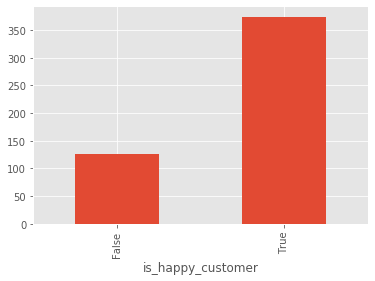

In [521]:
#sentences.groupby('airline_sentiment').size().plot(kind='bar')
dirty.groupby('is_happy_customer').size().plot(kind='bar')

##### Creating a list for the column that we need to analyse for the sentiments of customer feedback 

##### Analysing how many rows that are incorrect with sentiment
* is_happy_customer is incorrect as shown below: 
* The sentiment column below has the correct values according to the sentiment library and the formula created previously. 

In [522]:
list_columns=['customer_id','is_happy_customer','sentiment','latest_customer_review','compound','date','Fixed']

In [523]:
#dirty.loc[((dirty.is_happy_customer!=dirty.sentiment)),list_columns].count() ###28including 2 zeros for None[0]/blank[220]
dirty.loc[((dirty.is_happy_customer!=dirty.sentiment)),list_columns]

customer_id  is_happy_customer  sentiment  \
0    ID0356090889               True      False   
6    ID0781093248              False       True   
72   ID1982491305              False       True   
76   ID0103116463               True      False   
80   ID0356098879              False       True   
81   ID3213448164              False       True   
128  ID0026034528              False       True   
131  ID2141916025              False       True   
201  ID0361770607               True      False   
213  ID1327098207              False       True   
217  ID0248746702              False       True   
220  ID0331165101               True      False   
227  ID1463620974              False       True   
246  ID0054552163               True      False   
250  ID0052600161              False       True   
265  ID6167191700               True      False   
275  ID4884440889               True      False   
281  ID1560149460               True      False   
296  ID0400812567              False       True   
317  ID1463656488               True      False   
331  ID5424203859              False       True   
333  ID3210160835              False       True   
347  ID0412776176              False       True   
361  ID0767723857              False       True   
397  ID3072718451              False       True   
434  ID3210156251              False       True   
436  ID0774518617              False       True   
449  ID2020813895               True      False   

                                latest_customer_review  compound       date  \
0                                                 None    0.0000 2019-11-17   
6                                  five stars perfecto    0.3182 2019-04-12   
72                                         price clean    0.4019 2019-06-05   
76   i am with no charger and was two days late i a...   -0.5267 2019-02-07   
80                         five stars excellent phone.    0.5719 2019-01-08   
81   best in the world!!! i've always been a olivia...    0.6676 2019-08-26   
128  not the best not the worst phone the picture q...    0.9304 2019-12-24   
131    five stars bought it for my wife. she loves it!    0.6114 2019-04-28   
201  choose another this is the worst phone that i ...   -0.7430 2019-04-12   
213  best phone i've owned awesome phone love it. v...    0.9575 2019-07-20   
217  easy to see icons this is a smart phone that i...    0.5789 2019-07-27   
220                                                       0.0000 2019-05-10   
227  good tablet. wife loves it and would recommend...    0.7650 2019-07-16   
246  lucentrola won’t do warranty do not purchase t...   -0.7374 2019-01-06   
250  love the time it runs without recharging love ...    0.8069 2019-10-06   
265  one star terrible vendor be careful the phone ...   -0.3612 2019-12-13   
275  i bought the phone as a back up, when ... i bo...   -0.7906 2019-01-19   
281  phone is not as advertised i purchased this ph...   -0.8895 2019-08-06   
296  it is performing perfectly and i am happy with...    0.9523 2019-10-24   
317  i won’t purchase a phone again i did have to r...   -0.2846 2019-05-25   
331  very happy with the candle tablet! bought it t...    0.9284 2019-03-05   
333  the thunder is wonderful but i'm still learnin...    0.1128 2019-10-10   
347                                 very useful myself    0.4927 2019-10-03   
361  excellent phone at a good price unlocked excel...    0.9501 2019-10-07   
397                                    four stars good    0.4404 2019-04-20   
434  amazing looks like new love it work geart on v...    0.9286 2019-04-11   
436  a great phone from toshika as usual amazing ph...    0.8360 2019-04-25   
449  doesn't work in india i purchased the phone be...   -0.7343 2019-11-11   

     Fixed  
0    False  
6    False  
72   False  
76   False  
80   False  
81   False  
128  False  
131  False  
201  False  
213  False  
217  False  
220  False  
227  False  
246  False  
250  False  
265  False  
275  False  


###### There are 26 rows that are incorrect for is_happy_customer 

Excluding the two rows with the 0.0000 compiund value, that is for the none and black rows. 

In [524]:
dirty.loc[((dirty.is_happy_customer!=dirty.sentiment)&(dirty.compound!=0.0000)),list_columns].count()

customer_id               26
is_happy_customer         26
sentiment                 26
latest_customer_review    26
compound                  26
date                      26
Fixed                     26
dtype: int64

In [525]:
dirty.loc[((dirty.duplicated(['customer_id'],keep=False))),list_columns].sort_values(by=['customer_id']).count()

customer_id               20
is_happy_customer         20
sentiment                 20
latest_customer_review    20
compound                  20
date                      20
Fixed                     20
dtype: int64

In [526]:
dirty.loc[((dirty.duplicated(['customer_id'],keep=False))&(dirty.is_happy_customer!=dirty.sentiment) ),list_columns].sort_values(by=['customer_id'])

customer_id  is_happy_customer  sentiment  \
80   ID0356098879              False       True   
275  ID4884440889               True      False   

                                latest_customer_review  compound       date  \
80                         five stars excellent phone.    0.5719 2019-01-08   
275  i bought the phone as a back up, when ... i bo...   -0.7906 2019-01-19   

     Fixed  
80   False  
275  False

In [527]:
dirty.sentiment.value_counts() #118 . false

True     382
False    118
Name: sentiment, dtype: int64

In [528]:
dirty['Fix_sent'] = np.where((((dirty.is_happy_customer!=dirty.sentiment)&(dirty.compound!=0.0000))),
                           True,      
                           False)
dirty['Fixed'] =  np.where((((dirty.is_happy_customer!=dirty.sentiment)&(dirty.compound!=0.0000))),
                           True,      
                           dirty['Fixed'])

In [529]:
dirty.Fix_sent.value_counts()####26 errors does not include row 0 and 220 with compound val 0 which we are not sure yet.....

False    474
True      26
Name: Fix_sent, dtype: int64

In [530]:
#####Replacing Values###############
dirty.loc[((dirty.is_happy_customer!=dirty.sentiment)& (dirty.compound!=0.0000)), ['sentiment']]=dirty.loc[\
    ((dirty.is_happy_customer!=dirty.sentiment)& (dirty.compound!=0.0000)), ['is_happy_customer']].values

#### NOTE: 

##### These are to not be replaced with the sentiment value because: 

* They are none (The comment is written as "none") 


or 


* They are blank (There is no comment)  

* We will keep track on row: 0 and 220 

In [531]:
dirty.loc[((dirty.is_happy_customer!=dirty.sentiment)),list_columns]

customer_id  is_happy_customer  sentiment latest_customer_review  \
0    ID0356090889               True      False                   None   
220  ID0331165101               True      False                          

     compound       date  Fixed  
0         0.0 2019-11-17  False  
220       0.0 2019-05-10  False

In [532]:
dirty.Fixed.value_counts() ###up by 26 from 134 Total now 160 Fixed

False    340
True     160
Name: Fixed, dtype: int64

# Following for checking order price and order total 1.9 <a class="anchor" id="sec1.9"></a> 
* Now we will look at the order_price column and the order_total 
* There are two conditions TRUE or FALSE 
* TRUE: will show if the order_price and order_total is not correct = condition 1 
* FALSE: will show the correct order_price and order_total = condition 2 

In [533]:
condition1=((dirty.order_price-(dirty.order_price*(dirty.coupon_discount/100))+dirty.delivery_charges) != dirty.order_total)
condition2=((dirty.order_price-(dirty.order_price*(dirty.coupon_discount/100))+dirty.delivery_charges) == dirty.order_total)

In [534]:
###track the order to fix##
dirty['Fix_order'] = np.where((condition1),
                           True,      
                           False)

In [535]:
#dirty.Fix_order=dirty.Fix_order.astype(bool)
dirty.Fix_order.value_counts()

False    446
True      54
Name: Fix_order, dtype: int64

In [536]:
dirty.shape ###added two extra columns (total28) shopping_list  & Active

(500, 28)

This is to show the condition 1: incorrect order_price and order_total rows. 

In [537]:
dirty.loc[((condition1)),['order_price','order_total', 'delivery_charges', 'coupon_discount','Fix_order','Fixed','Fix_sent']].head()

order_price  order_total  delivery_charges  coupon_discount  Fix_order  \
0         23880      2452.86            103.86               10       True   
5         23810      4474.67             61.71                0       True   
18         3180     13228.66             81.16               25       True   
37        12770      4004.22             64.47               15       True   
44         2655      1733.41             78.41                0       True   

    Fixed  Fix_sent  
0   False     False  
5   False     False  
18  False     False  
37  False     False  
44  False     False

## These are good order lines

* We can use these rows to get our matrix. 
* Only one anomoly can exist. 

In [538]:
list_columns=['shopping_cart','order_price','order_total','Fix_order','Fixed','Fix_sent']

In [539]:
dirty.loc[((condition2)& (dirty.Fix_sent | dirty.Fixed==True)),list_columns]

shopping_cart  order_price  \
1    [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2    [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
4    [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   
6    [('Thunder line', 1), ('iStream', 2), ('iAssis...         8155   
9    [('iStream', 1), ('Olivia x460', 2), ('Candle ...         5490   
..                                                 ...          ...   
477         [('Thunder line', 1), ('iAssist Line', 1)]         4405   
478  [('Universe Note', 1), ('iStream', 2), ('Thund...        16750   
483  [('Thunder line', 2), ('iAssist Line', 1), ('C...         7445   
490                [('pearTV', 2), ('Toshika 750', 2)]        21260   
493  [('Toshika 750', 1), ('Olivia x460', 1), ('Uni...        12445   

     order_total  Fix_order  Fixed  Fix_sent  
1       13917.66      False   True     False  
2       10957.98      False   True     False  
4       10188.04      False   True     False  
6        6184.21      False   True      True  
9        4217.90      False   True     False  
..           ...        ...    ...       ...  
477      3387.59      False   True     False  
478     16809.69      False   True     False  
483      6766.21      False   True     False  
490     19217.00      False   True     False  
493     12541.33      False   True     False  

[160 rows x 6 columns]

## Fixing the Shopping cart 1.10 <a class="anchor" id="sec1.10"></a> 

* Change the datatype from str to list. 
* We can iterate over it if it is a list. 


In [540]:
type(dirty.shopping_cart[0])

str

In [541]:
import ast
sorted(ast.literal_eval(dirty.shopping_cart[0])) ###Tips from https://github.com/justmarkham/pycon-2019-tutorial

[('Candle Inferno', 1), ('Thunder line', 1)]

In [542]:
type(ast.literal_eval(dirty.shopping_cart[0]))

list

##### *Function to convert string to a list and sort items alphabeticly* 

In [543]:
def str_to_list(ratings_str):
    return sorted(ast.literal_eval(ratings_str))

In [544]:
str_to_list(dirty.shopping_cart[0])

[('Candle Inferno', 1), ('Thunder line', 1)]

#### *Make a new column called shopping_list.*

In [545]:
dirty['shopping_list'] = dirty.shopping_cart.apply(str_to_list)

 Making a bag of words to find a vocabulary of ten items for shopping list: 
 
 * {'pearTV', 'Universe Note', 'Thunder line', 'Olivia x460', 'Lucent 330S', 'Toshika 750', 'Alcon 10', 'iStream', 'iAssist Line', 'Candle Inferno'}

In [546]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(dirty.shopping_list))
words_list=[]
for i in words:
    words_list.append(i[0])
vocab=set(words_list)
print(vocab)


{'Toshika 750', 'iStream', 'Olivia x460', 'Thunder line', 'Alcon 10', 'Lucent 330S', 'Universe Note', 'Candle Inferno', 'pearTV', 'iAssist Line'}


#### Creating a sparse matrix for the items in the shopping list 

In [547]:
#######create np array and create Matrix 
a = np.array(dirty.shopping_list)
full_list=[]
vocab=list(vocab)
for rows in a:
    each_list=[0 for x in range(len(vocab))]   
    for each in range(len(vocab)):        
        for i in range(len(rows)):
            if vocab[each]==rows[i][0]:
                each_list[each]=rows[i][1]
              
    full_list.append(each_list)

print(len(full_list))

500


Making a dataframe for the sparse matrix
* Using vocabulary as a column 
* Adding order_price and the fixed column

In [548]:
m_df=pd.DataFrame(data=full_list,columns=vocab)
m_df = pd.concat([m_df, dirty[['order_price','Fixed']]], axis=1) 
m_df

Toshika 750  iStream  Olivia x460  Thunder line  Alcon 10  Lucent 330S  \
0              0        0            0             1         0            0   
1              0        0            1             0         0            2   
2              1        0            0             0         1            1   
3              0        0            0             2         0            0   
4              0        0            1             0         1            2   
..           ...      ...          ...           ...       ...          ...   
495            0        0            0             0         2            2   
496            0        2            1             0         0            2   
497            0        2            0             0         0            0   
498            2        1            2             0         2            0   
499            0        1            0             0         0            1   

     Universe Note  Candle Inferno  pearTV  iAssist Line  order_price  Fixed  
0                0               1       0             0        23880  False  
1                0               0       2             0        16305   True  
2                0               0       0             0        14500   True  
3                0               0       0             1         6585  False  
4                0               2       0             0        13495   True  
..             ...             ...     ...           ...          ...    ...  
495              0               0       0             0        20360  False  
496              0               0       0             0         3985  False  
497              0               0       1             1         8835  False  
498              0               0       0             0        29140  False  
499              0               0       1             0         7690  False  

[500 rows x 12 columns]

Checking datatype is correct

Finding the rows which have other errors other than order_price and shopping_list 
* We can calculate price using the np.linalg.solve
* 160 rows are now fixed

In [549]:
m_df[(dirty.Fixed==True)] ###160 Rows got fixed

Toshika 750  iStream  Olivia x460  Thunder line  Alcon 10  Lucent 330S  \
1              0        0            1             0         0            2   
2              1        0            0             0         1            1   
4              0        0            1             0         1            2   
6              0        2            0             1         0            0   
9              0        1            2             0         0            2   
..           ...      ...          ...           ...       ...          ...   
477            0        0            0             1         0            0   
478            2        2            0             2         0            0   
483            0        0            0             2         0            0   
490            2        0            0             0         0            0   
493            1        0            1             0         0            0   

     Universe Note  Candle Inferno  pearTV  iAssist Line  order_price  Fixed  
1                0               0       2             0        16305   True  
2                0               0       0             0        14500   True  
4                0               2       0             0        13495   True  
6                1               0       0             1         8155   True  
9                0               1       0             0         5490   True  
..             ...             ...     ...           ...          ...    ...  
477              0               0       0             1         4405   True  
478              1               0       0             0        16750   True  
483              0               2       0             1         7445   True  
490              0               0       2             0        21260   True  
493              2               0       0             0        12445   True  

[160 rows x 12 columns]

Creating another dataframe called m_df1 
* This has 160 clean rows to be used to calculate price of each item 

In [550]:
m_df1=m_df[(dirty.Fixed==True)]
m_df1[vocab]

Toshika 750  iStream  Olivia x460  Thunder line  Alcon 10  Lucent 330S  \
1              0        0            1             0         0            2   
2              1        0            0             0         1            1   
4              0        0            1             0         1            2   
6              0        2            0             1         0            0   
9              0        1            2             0         0            2   
..           ...      ...          ...           ...       ...          ...   
477            0        0            0             1         0            0   
478            2        2            0             2         0            0   
483            0        0            0             2         0            0   
490            2        0            0             0         0            0   
493            1        0            1             0         0            0   

     Universe Note  Candle Inferno  pearTV  iAssist Line  
1                0               0       2             0  
2                0               0       0             0  
4                0               2       0             0  
6                1               0       0             1  
9                0               1       0             0  
..             ...             ...     ...           ...  
477              0               0       0             1  
478              1               0       0             0  
483              0               2       0             1  
490              0               0       2             0  
493              2               0       0             0  

[160 rows x 10 columns]

#### Solving Matrix 
* Using np.linalg.solve function we can get the price for each item. 
* Creating a list that gives you the price for each of the 10 items. 
* Itereating 2 matrix of 10 rows out of 160 rows to confirm the price values are same.

In [551]:
price_matrix=[]
num_of_matrix=2 ####just getting two correct Matrix
counter=0
for i in range(num_of_matrix):

    a_matrix=np.array(m_df1[vocab][counter:counter+10])

    b_matrix=np.array(m_df1['order_price'][counter:counter+10])

    x=np.round(np.linalg.solve(a_matrix,b_matrix))
    x=list(x)
    price_matrix.append(x)
    counter+=len(vocab)
price_matrix

[[4320.0,
  150.0,
  1225.0,
  2180.0,
  8950.0,
  1230.0,
  3450.0,
  430.0,
  6310.0,
  2225.0],
 [4320.0,
  150.0,
  1225.0,
  2180.0,
  8950.0,
  1230.0,
  3450.0,
  430.0,
  6310.0,
  2225.0]]

### Making a dictionary of 10 items with the correct price 

In [552]:
price_list=price_matrix[0]
price_dict = {vocab[i]: price_list[i] for i in range(len(vocab))} 
price_dict

{'Toshika 750': 4320.0,
 'iStream': 150.0,
 'Olivia x460': 1225.0,
 'Thunder line': 2180.0,
 'Alcon 10': 8950.0,
 'Lucent 330S': 1230.0,
 'Universe Note': 3450.0,
 'Candle Inferno': 430.0,
 'pearTV': 6310.0,
 'iAssist Line': 2225.0}

### Deleting unwanted dataframes and list

In [553]:
# Clean up 
del m_df
del m_df1
del full_list

### Now we can fix the error of shopping_Cart

##### Creating function to calculate price of order_price column 
* Using the dictionary price_dict we can calculate price for shopping list. 

In [554]:
def calc_price(row):
    order_price=0
    for i in row:

        order_price=order_price+price_dict[i[0]]*i[1]

    return np.round(order_price)

In [555]:
list_columns=['shopping_cart','order_price','delivery_charges','coupon_discount','order_total','Fix_order','shopping_list']
dirty.loc[(condition1),list_columns].head()

shopping_cart  order_price  \
0        [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
5   [('Lucent 330S', 2), ('Universe Note', 1), ('A...        23810   
18  [('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...         3180   
37  [('Lucent 330S', 1), ('Olivia x460', 1), ('Thu...        12770   
44        [('Candle Inferno', 1), ('Olivia x460', 1)]         2655   

    delivery_charges  coupon_discount  order_total  Fix_order  \
0             103.86               10      2452.86       True   
5              61.71                0      4474.67       True   
18             81.16               25     13228.66       True   
37             64.47               15      4004.22       True   
44             78.41                0      1733.41       True   

                                        shopping_list  
0            [(Candle Inferno, 1), (Thunder line, 1)]  
5   [(Alcon 10, 2), (Lucent 330S, 2), (Universe No...  
18  [(Lucent 330S, 2), (Olivia x460, 2), (pearTV, 2)]  
37  [(Lucent 330S, 1), (Olivia x460, 1), (Thunder ...  
44            [(Candle Inferno, 1), (Olivia x460, 1)]

In [556]:
dirty.loc[(condition1),list_columns].count() ##54 values

shopping_cart       54
order_price         54
delivery_charges    54
coupon_discount     54
order_total         54
Fix_order           54
shopping_list       54
dtype: int64

##### Creating a new column called New_order 
* This will use calc_price function 
* Creating new column : New_order ; this will compare the order_price and order_total. 
* We are using order_price or order_total is wrong we have to calculate based on shopping_cart the correct price. 
* Find out if the order_total is correct OR the order price is correct. 
* NOTE: THERE CAN ONLY BE ONE ANOMOLY IN EACH ROW 


In [557]:
dirty['New_order'] = np.where((condition1),
                           dirty.shopping_list.apply(lambda row : calc_price(row)),      
                           dirty['order_price'])

In [558]:
dirty.New_order=dirty.New_order.astype(int)

In [559]:

dirty.loc[(condition1),list_columns+['New_order']]

shopping_cart  order_price  \
0         [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
5    [('Lucent 330S', 2), ('Universe Note', 1), ('A...        23810   
18   [('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...         3180   
37   [('Lucent 330S', 1), ('Olivia x460', 1), ('Thu...        12770   
44         [('Candle Inferno', 1), ('Olivia x460', 1)]         2655   
55                     [('pearTV', 2), ('iStream', 1)]        12770   
56   [('iStream', 1), ('iAssist Line', 1), ('Univer...        15775   
59                    [('pearTV', 1), ('Alcon 10', 2)]        24210   
64   [('Universe Note', 2), ('Lucent 330S', 1), ('i...        13000   
70   [('Lucent 330S', 1), ('Thunder line', 2), ('iA...        35900   
100  [('Toshika 750', 2), ('pearTV', 1), ('Universe...        22150   
117  [('iAssist Line', 2), ('Olivia x460', 1), ('Lu...        21410   
120          [('iAssist Line', 2), ('Olivia x460', 2)]         6900   
143                  [('Alcon 10', 2), ('iStream', 2)]         6500   
145  [('iAssist Line', 1), ('iStream', 2), ('Thunde...         6885   
154  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        11035   
158  [('iAssist Line', 1), ('Alcon 10', 1), ('Unive...        20935   
163   [('Alcon 10', 2), ('iStream', 1), ('pearTV', 1)]        24360   
200  [('Toshika 750', 1), ('iStream', 2), ('Lucent ...        11035   
221  [('Olivia x460', 1), ('Candle Inferno', 2), ('...        11035   
222          [('Thunder line', 2), ('Toshika 750', 2)]         9940   
231         [('Universe Note', 2), ('Toshika 750', 2)]        15540   
232  [('iStream', 1), ('Lucent 330S', 1), ('iAssist...         8940   
239  [('Universe Note', 2), ('Alcon 10', 1), ('Thun...        28850   
242  [('Lucent 330S', 1), ('iAssist Line', 1), ('To...        12395   
258  [('pearTV', 2), ('Olivia x460', 2), ('Alcon 10...        32970   
263               [('iAssist Line', 2), ('pearTV', 2)]        17070   
292  [('Universe Note', 1), ('Alcon 10', 1), ('iAss...        26330   
315  [('iStream', 2), ('Candle Inferno', 2), ('Tosh...         9800   
334  [('iStream', 1), ('Universe Note', 1), ('Olivi...        32830   
344               [('iStream', 1), ('Olivia x460', 1)]         9500   
354  [('iStream', 1), ('Alcon 10', 2), ('Lucent 330...        20140   
360  [('iStream', 2), ('Lucent 330S', 2), ('pearTV'...        13495   
368  [('pearTV', 2), ('iStream', 2), ('Thunder line...        21730   
375  [('Thunder line', 1), ('Candle Inferno', 2), (...        19155   
377          [('Lucent 330S', 2), ('Thunder line', 2)]        11830   
380  [('Universe Note', 2), ('iStream', 1), ('Alcon...        16000   
381             [('Alcon 10', 2), ('iAssist Line', 2)]         9865   
383  [('pearTV', 2), ('Alcon 10', 2), ('Olivia x460...        19400   
385  [('Candle Inferno', 1), ('Thunder line', 1), (...         7285   
386  [('iAssist Line', 1), ('pearTV', 1), ('Alcon 1...        16500   
391  [('iAssist Line', 2), ('Olivia x460', 1), ('pe...        24230   
425        [('Candle Inferno', 1), ('Toshika 750', 2)]        20170   
426  [('Alcon 10', 2), ('Olivia x460', 1), ('pearTV...        27660   
432        [('Candle Inferno', 2), ('Toshika 750', 2)]        28250   
438  [('Thunder line', 2), ('Toshika 750', 2), ('Ca...        20170   
446  [('Olivia x460', 1), ('Candle Inferno', 1), ('...        16450   
453             [('Thunder line', 1), ('Alcon 10', 2)]        20080   
458  [('Olivia x460', 2), ('Alcon 10', 2), ('iStrea...         6975   
463              [('iStream', 2), ('iAssist Line', 1)]         2525   
468  [('Alcon 10', 1), ('iAssist Line', 2), ('Lucen...        15860   
471  [('Universe Note', 2), ('Lucent 330S', 1), ('T...        16770   
480               [('iStream', 2), ('Toshika 750', 2)]         8940   
482  [('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...        11035   

     delivery_charges  coupon_discount  order_total  Fix_order  \
0              103.86               10      2452.86       True   
5  

NOW we can check where order_price is not equal to new_order  
* These are the rows we need to fix 
* There are 27 with order_price wrong 

In [560]:
dirty.loc[((condition1)& (dirty.order_price!=dirty.New_order)),list_columns+['New_order']].count()

shopping_cart       27
order_price         27
delivery_charges    27
coupon_discount     27
order_total         27
Fix_order           27
shopping_list       27
New_order           27
dtype: int64

In [561]:
dirty.loc[((condition1)& (dirty.order_price!=dirty.New_order)),list_columns+['New_order']].head()

shopping_cart  order_price  \
0        [('Thunder line', 1), ('Candle Inferno', 1)]        23880   
18  [('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...         3180   
37  [('Lucent 330S', 1), ('Olivia x460', 1), ('Thu...        12770   
44        [('Candle Inferno', 1), ('Olivia x460', 1)]         2655   
56  [('iStream', 1), ('iAssist Line', 1), ('Univer...        15775   

    delivery_charges  coupon_discount  order_total  Fix_order  \
0             103.86               10      2452.86       True   
18             81.16               25     13228.66       True   
37             64.47               15      4004.22       True   
44             78.41                0      1733.41       True   
56             70.40                5     20870.65       True   

                                        shopping_list  New_order  
0            [(Candle Inferno, 1), (Thunder line, 1)]       2610  
18  [(Lucent 330S, 2), (Olivia x460, 2), (pearTV, 2)]      17530  
37  [(Lucent 330S, 1), (Olivia x460, 1), (Thunder ...       4635  
44            [(Candle Inferno, 1), (Olivia x460, 1)]       1655  
56  [(Universe Note, 2), (iAssist Line, 1), (iStre...      21895

#### Condition 3 
* The price calulated from shopping list from New_order column comparing with the order_total to find out the incorrect order_total 
* There are 27 order_total rows which are wrong. 

In [562]:
condition3=((dirty.New_order-(dirty.New_order*(dirty.coupon_discount/100))+dirty.delivery_charges) != dirty.order_total)

In [563]:
dirty.loc[((condition1)& (condition3)),list_columns+['New_order']].count()

shopping_cart       27
order_price         27
delivery_charges    27
coupon_discount     27
order_total         27
Fix_order           27
shopping_list       27
New_order           27
dtype: int64

In [564]:
dirty.loc[((condition1)& (condition3)),list_columns+['New_order']].head()

shopping_cart  order_price  \
5    [('Lucent 330S', 2), ('Universe Note', 1), ('A...        23810   
55                     [('pearTV', 2), ('iStream', 1)]        12770   
59                    [('pearTV', 1), ('Alcon 10', 2)]        24210   
100  [('Toshika 750', 2), ('pearTV', 1), ('Universe...        22150   
120          [('iAssist Line', 2), ('Olivia x460', 2)]         6900   

     delivery_charges  coupon_discount  order_total  Fix_order  \
5               61.71                0      4474.67       True   
55              65.78               10      3387.59       True   
59              70.01               25     19662.75       True   
100             77.54               10      7117.36       True   
120             86.00               15     24867.40       True   

                                         shopping_list  New_order  
5    [(Alcon 10, 2), (Lucent 330S, 2), (Universe No...      23810  
55                         [(iStream, 1), (pearTV, 2)]      12770  
59                        [(Alcon 10, 2), (pearTV, 1)]      24210  
100  [(Toshika 750, 2), (Universe Note, 2), (iStrea...      22150  
120              [(Olivia x460, 2), (iAssist Line, 2)]       6900

##### NOW WE UPDATE OUR FIXED COLUMN 
* We need to track the errors before we can fix 
* There are 54 new errors to be fixed. 

In [565]:


dirty['Fixed'] =  np.where((condition1),
                           True,      
                           dirty['Fixed'])
dirty.Fixed.value_counts() ###jumped from 160 to 214 by 54 new added for Fixed_order

False    286
True     214
Name: Fixed, dtype: int64

FIX the order_total column with the correct values. 

In [566]:
dirty.loc[((condition1)& (condition3)),['order_total']]=(dirty.order_price-(dirty.order_price*(dirty.coupon_discount/100))+dirty.delivery_charges)

#### Finding error with order_price 
* Fixing order_price and order_total with correct value.

In [567]:
dirty.loc[((condition1)& (condition3)),list_columns+['New_order']].head()

shopping_cart  order_price  \
5    [('Lucent 330S', 2), ('Universe Note', 1), ('A...        23810   
55                     [('pearTV', 2), ('iStream', 1)]        12770   
59                    [('pearTV', 1), ('Alcon 10', 2)]        24210   
100  [('Toshika 750', 2), ('pearTV', 1), ('Universe...        22150   
120          [('iAssist Line', 2), ('Olivia x460', 2)]         6900   

     delivery_charges  coupon_discount  order_total  Fix_order  \
5               61.71                0     23871.71       True   
55              65.78               10     11558.78       True   
59              70.01               25     18227.51       True   
100             77.54               10     20012.54       True   
120             86.00               15      5951.00       True   

                                         shopping_list  New_order  
5    [(Alcon 10, 2), (Lucent 330S, 2), (Universe No...      23810  
55                         [(iStream, 1), (pearTV, 2)]      12770  
59                        [(Alcon 10, 2), (pearTV, 1)]      24210  
100  [(Toshika 750, 2), (Universe Note, 2), (iStrea...      22150  
120              [(Olivia x460, 2), (iAssist Line, 2)]       6900

Fixing the order_price 

In [568]:
dirty.loc[((condition1)& (dirty.order_price!=dirty.New_order)),['order_price']]=dirty['New_order']

In [569]:
dirty[list_columns+['New_order']].head()

shopping_cart  order_price  \
0       [('Thunder line', 1), ('Candle Inferno', 1)]         2610   
1  [('pearTV', 2), ('Lucent 330S', 2), ('Olivia x...        16305   
2  [('Alcon 10', 1), ('Toshika 750', 1), ('Lucent...        14500   
3         [('Thunder line', 2), ('iAssist Line', 1)]         6585   
4  [('Candle Inferno', 2), ('Olivia x460', 1), ('...        13495   

   delivery_charges  coupon_discount  order_total  Fix_order  \
0            103.86               10      2452.86       True   
1             58.41               15     13917.66      False   
2             82.98               25     10957.98      False   
3             92.04               15      5689.29      False   
4             66.79               25     10188.04      False   

                                       shopping_list  New_order  
0           [(Candle Inferno, 1), (Thunder line, 1)]       2610  
1  [(Lucent 330S, 2), (Olivia x460, 1), (pearTV, 2)]      16305  
2  [(Alcon 10, 1), (Lucent 330S, 1), (Toshika 750...      14500  
3             [(Thunder line, 2), (iAssist Line, 1)]       6585  
4  [(Alcon 10, 1), (Candle Inferno, 2), (Lucent 3...      13495

# Incorrect Shopping list and find out correct shooping list

* Correcting the price for shopping list items 
* Make a new column called incorrect_order 
* This column will tell us which of the shopping_cart order_price does not match. 

In [570]:
dirty['incorrect_order'] = np.where((dirty.shopping_list),
                           dirty.shopping_list.apply(lambda row : calc_price(row)),      
                           dirty['order_price'])

In [571]:
dirty.loc[(dirty.order_price!=dirty.incorrect_order),list_columns+['incorrect_order','Fixed']].count()
dirty.loc[(dirty.order_price!=dirty.incorrect_order),list_columns+['incorrect_order','Fixed']].head()

shopping_cart  order_price  \
8   [('Universe Note', 2), ('iStream', 2), ('Lucen...         9380   
26                    [('pearTV', 2), ('iStream', 2)]         7200   
27         [('Lucent 330S', 1), ('Universe Note', 2)]         9125   
41  [('Lucent 330S', 2), ('Universe Note', 2), ('A...         9510   
60          [('iAssist Line', 1), ('Toshika 750', 2)]         8790   

    delivery_charges  coupon_discount  order_total  Fix_order  \
8              95.29               15      8068.29      False   
26             72.47                0      7272.47      False   
27             83.16                5      8751.91      False   
41             52.66                5      9087.16      False   
60             68.90               25      6661.40      False   

                                        shopping_list  incorrect_order  Fixed  
8   [(Lucent 330S, 1), (Universe Note, 2), (iStrea...           8430.0  False  
26                        [(iStream, 2), (pearTV, 2)]          12920.0  False  
27             [(Lucent 330S, 1), (Universe Note, 2)]           8130.0  False  
41  [(Alcon 10, 1), (Lucent 330S, 2), (Universe No...          18310.0  False  
60              [(Toshika 750, 2), (iAssist Line, 1)]          10865.0  False

#### This function will return shopping_list
* Based on the price returns correct shopping cart items and items value because item values cannot be wrong and we have already confirmed the order_price and order_total has been corrected. 
* This function will only be applied where the shopping_cart calculation cannot match order_price. 

In [572]:
import itertools
items_list=list(vocab) ###10 items in the list
def calc_shopping_cart(row):    
    values_list=[x[1] for x in row.shopping_list] ####Values are correct in each Cart
    l=len(values_list) 
    for k in itertools.permutations(items_list,l):
        L=zip(k,values_list)
        value_price=calc_price(list(L))
        if value_price==row.order_price:
            r=zip(k, values_list)
            r=list(r)
            return r


Correct shopping column is created to identify the incorrect shopping_Cart items. 

In [573]:
dirty['correct_shopping'] = np.where((dirty.order_price!=dirty.incorrect_order),
                           dirty.apply((lambda row : calc_shopping_cart(row)),axis=1),      
                           dirty['shopping_list'])  

In [574]:

dirty.loc[(dirty.order_price!=dirty.incorrect_order),list_columns+['incorrect_order','Fixed','correct_shopping']].head()

shopping_cart  order_price  \
8   [('Universe Note', 2), ('iStream', 2), ('Lucen...         9380   
26                    [('pearTV', 2), ('iStream', 2)]         7200   
27         [('Lucent 330S', 1), ('Universe Note', 2)]         9125   
41  [('Lucent 330S', 2), ('Universe Note', 2), ('A...         9510   
60          [('iAssist Line', 1), ('Toshika 750', 2)]         8790   

    delivery_charges  coupon_discount  order_total  Fix_order  \
8              95.29               15      8068.29      False   
26             72.47                0      7272.47      False   
27             83.16                5      8751.91      False   
41             52.66                5      9087.16      False   
60             68.90               25      6661.40      False   

                                        shopping_list  incorrect_order  Fixed  \
8   [(Lucent 330S, 1), (Universe Note, 2), (iStrea...           8430.0  False   
26                        [(iStream, 2), (pearTV, 2)]          12920.0  False   
27             [(Lucent 330S, 1), (Universe Note, 2)]           8130.0  False   
41  [(Alcon 10, 1), (Lucent 330S, 2), (Universe No...          18310.0  False   
60              [(Toshika 750, 2), (iAssist Line, 1)]          10865.0  False   

                                     correct_shopping  
8   [(Thunder line, 1), (iStream, 2), (Universe No...  
26                 [(iStream, 2), (Universe Note, 2)]  
27            [(iAssist Line, 1), (Universe Note, 2)]  
41  [(iStream, 1), (Lucent 330S, 2), (Universe Not...  
60                   [(Toshika 750, 2), (iStream, 1)]

In [575]:
dirty['Fixed'] =  np.where((dirty.order_price!=dirty.incorrect_order),
                           True,      
                           dirty['Fixed'])

In [576]:
dirty['Fixed'].value_counts() #jumped to 241 up by 27

False    259
True     241
Name: Fixed, dtype: int64

In [577]:
dirty.loc[(dirty.order_price!=dirty.incorrect_order),['shopping_cart']]=dirty['correct_shopping']

In [578]:
dirty.loc[(dirty.order_price!=dirty.incorrect_order),list_columns+['incorrect_order','Fixed','correct_shopping']].head()

shopping_cart  order_price  \
8   [(Thunder line, 1), (iStream, 2), (Universe No...         9380   
26                 [(iStream, 2), (Universe Note, 2)]         7200   
27            [(iAssist Line, 1), (Universe Note, 2)]         9125   
41  [(iStream, 1), (Lucent 330S, 2), (Universe Not...         9510   
60                   [(Toshika 750, 2), (iStream, 1)]         8790   

    delivery_charges  coupon_discount  order_total  Fix_order  \
8              95.29               15      8068.29      False   
26             72.47                0      7272.47      False   
27             83.16                5      8751.91      False   
41             52.66                5      9087.16      False   
60             68.90               25      6661.40      False   

                                        shopping_list  incorrect_order  Fixed  \
8   [(Lucent 330S, 1), (Universe Note, 2), (iStrea...           8430.0   True   
26                        [(iStream, 2), (pearTV, 2)]          12920.0   True   
27             [(Lucent 330S, 1), (Universe Note, 2)]           8130.0   True   
41  [(Alcon 10, 1), (Lucent 330S, 2), (Universe No...          18310.0   True   
60              [(Toshika 750, 2), (iAssist Line, 1)]          10865.0   True   

                                     correct_shopping  
8   [(Thunder line, 1), (iStream, 2), (Universe No...  
26                 [(iStream, 2), (Universe Note, 2)]  
27            [(iAssist Line, 1), (Universe Note, 2)]  
41  [(iStream, 1), (Lucent 330S, 2), (Universe Not...  
60                   [(Toshika 750, 2), (iStream, 1)]

In [579]:
dirty.iloc[220]

order_id                                                                 ORD116173
customer_id                                                           ID0331165101
date                                                           2019-05-10 00:00:00
nearest_warehouse                                                        Nickolson
shopping_cart                    [('Olivia x460', 1), ('Lucent 330S', 1), ('Alc...
order_price                                                                  15725
delivery_charges                                                             68.87
customer_lat                                                              -37.7994
customer_long                                                              144.968
coupon_discount                                                                  0
order_total                                                                15793.9
season                                                                      Autumn
is_e

In [580]:
list_columns=['customer_id','is_happy_customer','sentiment','latest_customer_review','compound','date','Fixed']

### Fixing left over rows 

Fixing up one blank value for latest_Customer_review column which was left previously due to compound value of 0.0 
* We can have only one anomoly in one row. 
* if this is an anomoly we have no other choice to just put none. 

In [581]:
dirty.loc[(dirty.compound==0)&(dirty.Fixed==False)&(dirty.is_happy_customer==True),list_columns]

customer_id  is_happy_customer  sentiment latest_customer_review  \
220  ID0331165101               True      False                          

     compound       date  Fixed  
220       0.0 2019-05-10  False

In [582]:
dirty.loc[(dirty.compound==0)&(dirty.Fixed==False)&(dirty.is_happy_customer==True),"latest_customer_review"]="None"

In [583]:
dirty.loc[(dirty.compound==0)&(dirty.Fixed==False)&(dirty.is_happy_customer==True),list_columns]

customer_id  is_happy_customer  sentiment latest_customer_review  \
220  ID0331165101               True      False                   None   

     compound       date  Fixed  
220       0.0 2019-05-10  False

In [584]:
dirty.describe(include=['O'])

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


order_id   customer_id nearest_warehouse  \
count         500           500               500   
unique        500           490                 3   
top     ORD175233  ID0287629259          Thompson   
freq            1             2               219   

                                    shopping_cart  season  \
count                                         500     500   
unique                                        476       4   
top     [('iAssist Line', 2), ('Olivia x460', 2)]  Summer   
freq                                            4     138   

       latest_customer_review new_season                        shopping_list  \
count                     500        500                                  500   
unique                    499          4                                  443   
top                      None     Summer  [(Alcon 10, 2), (Universe Note, 2)]   
freq                        2        138                                    4   

                           correct_shopping  
count                                   500  
unique                                  446  
top     [(Alcon 10, 2), (Universe Note, 2)]  
freq                                      4

# SAVE output file dirty_data 1.11 <a class="anchor" id="sec1.11"></a> 

In [585]:
cols = list(dirty.columns)
df = dirty[cols[0:16]]

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [587]:
df.describe(include=['O'])

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


order_id   customer_id nearest_warehouse  \
count         500           500               500   
unique        500           490                 3   
top     ORD175233  ID0287629259          Thompson   
freq            1             2               219   

                                    shopping_cart  season  \
count                                         500     500   
unique                                        476       4   
top     [('iAssist Line', 2), ('Olivia x460', 2)]  Summer   
freq                                            4     138   

       latest_customer_review  
count                     500  
unique                    499  
top                      None  
freq                        2

In [588]:
df.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    500.000000         500.00000    500.000000     500.000000   
mean   14323.690000          77.66190    -37.812238     144.965485   
std     8093.696008          14.55888      0.007715       0.021109   
min      730.000000          45.30000    -37.834322     144.904907   
25%     7770.000000          67.04000    -37.818746     144.950382   
50%    13405.000000          77.00000    -37.812376     144.963204   
75%    20057.500000          85.09000    -37.805778     144.981018   
max    39330.000000         130.79000    -37.788784     145.016633   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       500.000000    500.000000                     500.000000  
mean         10.930000  12817.482400                       1.104810  
std           8.731413   7302.596076                       0.553444  
min           0.000000    699.380000                       0.063100  
25%           5.000000   6775.922500                       0.721675  
50%          10.000000  11813.850000                       1.081350  
75%          15.000000  18021.302500                       1.432575  
max          25.000000  37426.080000                       4.533300

In [589]:
df.shape

(500, 16)

In [590]:
df.to_csv('28130006_dirty_data_solution.csv',index=False)

# Missing values 2.1 <a class="anchor" id="sec2.1"></a> 

Now we will look at the mising data csv file and impute missing values by analysing the data. 
* Fist we will read 28130006_mising_data_csv by Pandas library. 
* Then we will analyse the data frame and its data type. 
* We then can find out the null value in each column. 

In [591]:
missing = pd.read_csv("28130006_missing_data.csv")

In [592]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [593]:
missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

## Creating a copy to test linear model for delivery charges 2.2 <a class="anchor" id="sec2.2"></a> 
* We will use this copy when creating our linear model. 

In [594]:
missing_impute_df=missing.copy()

* Creating a delivery_null column for the features related to delivery_charges that have null values. 
* This column will be used later for testing the prediction for deliver_charges. 


**As mentioned in the assignment:** 

" 8. The store has different business rules depending on the season to match the different
demands of each season. For example, delivery charge is calculated using a linear model
which differs depending on the season. The model depends linearly (but in different ways for
each season) on:
1. Distance between customer and nearest warehouse
2. Whether the customer wants an expedited delivery
3. Whether the customer was happy with his/her last purchase (if no previous purchase,
it is assumed that the customer is happy) " 



**Features that have null values:**

* delivery_charges
* distance_to_nearest_warehouse
* is_happy_customer 

In [595]:
missing_impute_df['delivery_null'] =  np.where((missing_impute_df.delivery_charges.isnull()),
                           True,      
                           False)

In [596]:
missing_impute_df['delivery_null'] =  np.where((missing_impute_df.distance_to_nearest_warehouse.isnull()),
                           True,      
                           missing_impute_df['delivery_null'])

In [597]:
missing_impute_df['delivery_null'] =  np.where((missing_impute_df.is_happy_customer.isnull()),
                           True,      
                           missing_impute_df['delivery_null'])

In [598]:
missing_impute_df.delivery_null.value_counts()

False    389
True     111
Name: delivery_null, dtype: int64

## Imputing missing values for delivery_charges 2.3  <a class="anchor" id="sec2.3"></a>  

* Formula for delivery charges based on the order_price, order_total and coupon_discount 
* confirming if delivery_charges isnull = 0  

In [599]:

missing.loc[(missing.delivery_charges.isnull()),['delivery_charges']]=missing.order_total-((missing.order_price)-(missing.order_price*((missing.coupon_discount)/100)))



In [600]:
missing.loc[(missing.delivery_charges.isnull()),['delivery_charges']]

Empty DataFrame
Columns: [delivery_charges]
Index: []

* There are 55 null values in nearest_warehouse
* There are 15 null values in order_price 
* There 15 null values in order_total 
* There are 31 null values in distance_to_nearest_warehouse 
* There are 40 null values in is_happy_customer 


In [601]:
missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

## Imputing order_price and order_total 2.4  <a class="anchor" id="sec2.4"></a> 
* Function calc_price that will use price_dict that was calculated in dirty_data section 1 of this assignment. 
* The price_dict contains the value for each items in the shopping_cart.  

In [602]:
#####just modified and added np.round#####
def calc_price(row):
    order_price=0
    for i in row:
        #print(i[0])
        order_price=order_price+price_dict[i[0]]*i[1]
        #print(i[1])
    #print(order_price)
    return np.round(order_price)


* There are  null values in order_price. 
* Count the rows where order_price is null.
* The count for order_total is also 0 which explains the same row have null value where order_price is null. 
* The other columns have values. 

In [603]:
missing.loc[(missing.order_price.isnull())].count()

order_id                         15
customer_id                      15
date                             15
nearest_warehouse                15
shopping_cart                    15
order_price                       0
delivery_charges                 15
customer_lat                     15
customer_long                    15
coupon_discount                  15
order_total                       0
season                           15
is_expedited_delivery            15
distance_to_nearest_warehouse    15
latest_customer_review           15
is_happy_customer                15
dtype: int64

* Creating another column "shopping_list" based on shopping_cart (This was used in section 1) This converts the shopping_cart string column into a list column. 
* Next we will use shopping_list and calc_price to update the order_price column 
* After fixing we will check the null value of the order_price column. (They have been fixed) 


In [604]:
missing['shopping_list'] = missing.shopping_cart.apply(str_to_list)

In [605]:
missing['order_price'] = np.where((missing.order_price.isnull()),
                           missing.shopping_list.apply(lambda row : calc_price(row)),      
                           missing['order_price'])

In [606]:
missing.loc[(missing.order_total.isnull())].count()

order_id                         15
customer_id                      15
date                             15
nearest_warehouse                15
shopping_cart                    15
order_price                      15
delivery_charges                 15
customer_lat                     15
customer_long                    15
coupon_discount                  15
order_total                       0
season                           15
is_expedited_delivery            15
distance_to_nearest_warehouse    15
latest_customer_review           15
is_happy_customer                15
shopping_list                    15
dtype: int64

#### Updating the order_total based on order_proce 
* We can not impute the order_total based on formula below. 
* We will use the order_price deliver_charges and coupon_discount to calculate the order_total.  


In [607]:
missing.loc[(missing.order_total.isnull()),'order_total']=(missing.order_price-(missing.order_price*(missing.coupon_discount/100))+missing.delivery_charges)


In [608]:
missing.loc[(missing.order_total.isnull())]

Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer, shopping_list]
Index: []

* Checking if the order_total and order_price and deliver_charges have been fixed. 
* We have nearest_warehouse, distance_to_nearest_warhouse and is_customer_happy that still have null values. 

In [609]:
missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
shopping_list                     0
dtype: int64

##  Imputing nearest_warehouse and distance_to_nearest_warehouse 2.5  <a class="anchor" id="sec2.5"></a> 
* We will use the function "get_warehouse_from_dist" this will find out the warehouse distance using the haversine function used in section 1. 
* We will use another function "get_nearest_warehouse" modified from section 1. This will get the nearest warehouse as per customer latitude and longitude. 
* We have also used location data frame made in section 1. This was based on ***warehouse.csv*** 

In [610]:
#######new function for Missing file ### to find out the warehouse from Dist
def get_warehouse_from_dist(row):
    for i,rows in location.iterrows():
        #print(i)
        if np.isclose(haversine(rows[0],rows[1],row.customer_lat,row.customer_long),row.distance_to_nearest_warehouse):
            return i


In [611]:
########Modified for Missing File##### to get the nearest warehouse as per customer lat and long
def get_near_warehouse(row):
    dist_dict={}
    for i,rows in location.iterrows():
        dis=haversine(rows[0],rows[1],row.customer_lat,row.customer_long)
        dist_dict[i]=dis

    r=[k for k,v in dist_dict.items() if v==min(dist_dict.values())][0]
    return r

* We will impute the "nearest_warehouse" column based on the customer latitude and longitude where nearest_warehouse and distance_to_nearest_warehouse is null.
* We are using the **get_near_warehouse** function.

In [612]:
missing['nearest_warehouse'] = np.where(((missing.nearest_warehouse.isnull())& (missing.distance_to_nearest_warehouse.isnull())),
                           missing.apply((lambda row : get_near_warehouse(row)),axis=1),      
                           missing['nearest_warehouse'])

* Checking null count distance_to_nearest_warehouse: this is 31 
* Checking nearest_warehouse null count: this is now 24. 


In [613]:
missing.loc[(missing.distance_to_nearest_warehouse.isnull())].count()

order_id                         31
customer_id                      31
date                             31
nearest_warehouse                31
shopping_cart                    31
order_price                      31
delivery_charges                 31
customer_lat                     31
customer_long                    31
coupon_discount                  31
order_total                      31
season                           31
is_expedited_delivery            31
distance_to_nearest_warehouse     0
latest_customer_review           31
is_happy_customer                31
shopping_list                    31
dtype: int64

In [614]:
missing.loc[(missing.nearest_warehouse.isnull())].count()

order_id                         24
customer_id                      24
date                             24
nearest_warehouse                 0
shopping_cart                    24
order_price                      24
delivery_charges                 24
customer_lat                     24
customer_long                    24
coupon_discount                  24
order_total                      24
season                           24
is_expedited_delivery            24
distance_to_nearest_warehouse    24
latest_customer_review           24
is_happy_customer                24
shopping_list                    24
dtype: int64

**Analysing nearest_warehouse**

In [615]:
missing[~missing.nearest_warehouse.isnull()].head()

order_id   customer_id        date nearest_warehouse  \
0  ORD261173  ID0130015094  2019-05-04         Nickolson   
1  ORD066780  ID0030287518  2019-10-13            Bakers   
2  ORD188406  ID0107156531  2019-09-14         Nickolson   
3  ORD472719  ID0030947457  2019-02-05         Nickolson   
4  ORD079358  ID1283628983  2019-10-24          Thompson   

                                       shopping_cart  order_price  \
0  [('Universe Note', 2), ('Thunder line', 2), ('...      14945.0   
1  [('iStream', 2), ('Toshika 750', 2), ('Olivia ...      10165.0   
2         [('Toshika 750', 2), ('Universe Note', 2)]      15540.0   
3  [('pearTV', 2), ('Candle Inferno', 1), ('iAssi...      19680.0   
4      [('Candle Inferno', 2), ('Universe Note', 2)]       7760.0   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             78.37    -37.815717     144.968326               10   
1             77.66    -37.802294     144.990587               25   
2             76.15    -37.823450     144.977078               15   
3             82.74    -37.803395     144.966346               10   
4            107.30    -37.799795     144.955286                0   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0     13528.87  Autumn                   True                         0.3380   
1      7701.41  Spring                  False                            NaN   
2     13285.15  Spring                  False                         0.8545   
3     17794.74  Summer                  False                         1.7153   
4      7867.30  Spring                   True                         1.6055   

                              latest_customer_review  is_happy_customer  \
0          good experience. truly a.good experience.                1.0   
1                   five stars great phone, worth it                1.0   
2                     s 10 olivia love the new phone                1.0   
3                            recommended recommended                1.0   
4  great phone for the price! so far i am very ha...                1.0   

                                       shopping_list  
0  [(Lucent 330S, 2), (Olivia x460, 1), (Thunder ...  
1  [(Olivia x460, 1), (Toshika 750, 2), (iStream,...  
2             [(Toshika 750, 2), (Universe Note, 2)]  
3  [(Candle Inferno, 1), (Thunder line, 1), (iAss...  
4          [(Candle Inferno, 2), (Universe Note, 2)]

In [616]:
missing[missing.nearest_warehouse.isnull()].head()

order_id   customer_id        date nearest_warehouse  \
33  ORD428765  ID0356449290  2019-12-30               NaN   
46  ORD144158  ID0778814205  2019-11-06               NaN   
56  ORD380057  ID0577458194  2019-11-27               NaN   
64  ORD030739  ID0214146568  2019-04-04               NaN   
71  ORD274873  ID0250933595  2019-01-27               NaN   

                                        shopping_cart  order_price  \
33      [('Candle Inferno', 1), ('Universe Note', 1)]       3880.0   
46        [('Toshika 750', 1), ('Candle Inferno', 2)]       5180.0   
56  [('Lucent 330S', 2), ('Thunder line', 2), ('iA...      23890.0   
64  [('Candle Inferno', 1), ('Universe Note', 1), ...       8555.0   
71  [('Lucent 330S', 1), ('Toshika 750', 2), ('iAs...      12095.0   

    delivery_charges  customer_lat  customer_long  coupon_discount  \
33             91.97    -37.807116     144.987663                5   
46             83.72    -37.799531     144.955688               10   
56             75.67    -37.818701     144.978207                5   
64             83.41    -37.805639     144.971528               10   
71             85.03    -37.822486     145.001686               15   

    order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
33      3777.97  Summer                   True                         0.7388   
46      4745.72  Spring                  False                         1.6477   
56     22771.17  Spring                  False                         0.7613   
64      7782.91  Autumn                   True                         1.4526   
71     10365.78  Summer                   True                         1.5018   

                               latest_customer_review  is_happy_customer  \
33                  totally worth it. great quality !                1.0   
46  great speaker i n this! i love this so much mo...                1.0   
56                               good conditions none                1.0   
64                                  great nothing lol                1.0   
71  unreliable there's nothing fancy to this phone...                0.0   

                                        shopping_list  
33          [(Candle Inferno, 1), (Universe Note, 1)]  
46            [(Candle Inferno, 2), (Toshika 750, 1)]  
56  [(Lucent 330S, 2), (Thunder line, 2), (iAssist...  
64  [(Candle Inferno, 1), (Olivia x460, 2), (Unive...  
71  [(Lucent 330S, 1), (Toshika 750, 2), (iAssist ...

### Finding the nearest_warehouse lat and long 

***We need to calculate the diatance where:***
* the distance to nearest_warehouse is null 
* But nearest_warehouse value is not null 

We need two new columns for warehouse latitude and warehouse longitude based on location data frame created in section 1. This was based on the file provided : ***warehouse.csv***

In [617]:
########Modified Function to handle np.NaN
def name_extract(word):
    if type(word)==str:
        return location.loc[word.strip()].lat
    else:
        return word
def name_extract2(word):
    if type(word)==str:
        return location.loc[word.strip()].lon
    else:
        return word

In [618]:
#####crete two new column for warehouse lat and long with nearest_warehouse information
missing['warehouse_lat'] =0.0
missing['warehouse_lon']=0.0
missing['warehouse_lat'] = np.where(~missing.nearest_warehouse.isnull(),
                           missing.nearest_warehouse.apply(lambda row : name_extract(row)),      
                           missing['warehouse_lon'])

missing['warehouse_lon'] = np.where((~missing.nearest_warehouse.isnull()),
                           missing.nearest_warehouse.apply(lambda row : name_extract2(row)),      
                           missing['warehouse_lon'])


In [619]:
missing[missing.distance_to_nearest_warehouse.isnull()].count()

order_id                         31
customer_id                      31
date                             31
nearest_warehouse                31
shopping_cart                    31
order_price                      31
delivery_charges                 31
customer_lat                     31
customer_long                    31
coupon_discount                  31
order_total                      31
season                           31
is_expedited_delivery            31
distance_to_nearest_warehouse     0
latest_customer_review           31
is_happy_customer                31
shopping_list                    31
warehouse_lat                    31
warehouse_lon                    31
dtype: int64

* We are creating a new column called "dist" this will use the harvesine function and calculate the distance based on the warehouse latitude, warehouse longitude, customer latitude, customer longitude.  
* We can impute the distance_to_Warehouse where it is **NULL**

In [620]:
missing['dist'] = \
    haversine(missing.warehouse_lat,missing.warehouse_lon,missing.customer_lat,missing.customer_long)

In [621]:
missing[missing.distance_to_nearest_warehouse.isnull()]

order_id   customer_id        date nearest_warehouse  \
1    ORD066780  ID0030287518  2019-10-13            Bakers   
7    ORD001991  ID0733565782  2019-06-21         Nickolson   
11   ORD041434  ID2180815093  2019-07-12         Nickolson   
15   ORD352577  ID0417270193  2019-03-11            Bakers   
17   ORD110744  ID0589419728  2019-12-12         Nickolson   
34   ORD213672  ID0781109202  2019-09-22            Bakers   
48   ORD231085  ID0370749206  2019-10-28            Bakers   
83   ORD322756  ID0576868762  2019-05-21            Bakers   
85   ORD125451  ID0317903875  2019-10-06          Thompson   
98   ORD151150  ID0477078776  2019-07-25         Nickolson   
101  ORD195292  ID0319157172  2019-02-06         Nickolson   
111  ORD181169  ID0579497586  2019-05-20          Thompson   
156  ORD034336  ID5776644660  2019-07-30            Bakers   
161  ORD036134  ID0767729209  2019-09-21          Thompson   
180  ORD258897  ID4754200401  2019-11-24          Thompson   
241  ORD136123  ID2397324992  2019-12-08          Thompson   
250  ORD478830  ID0242532862  2019-10-04         Nickolson   
252  ORD020594  ID1449431395  2019-04-21         Nickolson   
255  ORD255782  ID0384013628  2019-06-02            Bakers   
260  ORD108927  ID2792456569  2019-02-02            Bakers   
268  ORD231385  ID0477077882  2019-07-15         Nickolson   
305  ORD241924  ID0767724093  2019-09-03         Nickolson   
313  ORD063121  ID0710041389  2019-04-23          Thompson   
333  ORD268466  ID4655129025  2019-05-22          Thompson   
387  ORD405599  ID0233274930  2019-11-03         Nickolson   
411  ORD019039  ID6167357863  2019-06-04         Nickolson   
451  ORD499477  ID0577456444  2019-04-09            Bakers   
460  ORD267489  ID1449431517  2019-04-09         Nickolson   
486  ORD031497  ID0575390860  2019-02-03         Nickolson   
495  ORD285220  ID0575380979  2019-02-14         Nickolson   
496  ORD488821  ID4847645684  2019-02-18            Bakers   

                                         shopping_cart  order_price  \
1    [('iStream', 2), ('Toshika 750', 2), ('Olivia ...      10165.0   
7    [('iAssist Line', 1), ('Toshika 750', 2), ('pe...      17175.0   
11   [('Lucent 330S', 1), ('pearTV', 1), ('iStream'...       7840.0   
15   [('Candle Inferno', 2), ('Thunder line', 1), (...      12910.0   
17               [('iAssist Line', 1), ('iStream', 2)]       2525.0   
34          [('Universe Note', 1), ('Olivia x460', 1)]       4675.0   
48   [('pearTV', 1), ('Universe Note', 1), ('Lucent...      19940.0   
83                [('iAssist Line', 2), ('pearTV', 1)]      10760.0   
85               [('Olivia x460', 2), ('Alcon 10', 2)]      20350.0   
98   [('Alcon 10', 2), ('pearTV', 2), ('Candle Infe...      31380.0   
101               [('iStream', 2), ('Lucent 330S', 1)]       1530.0   
111  [('Lucent 330S', 2), ('Universe Note', 2), ('T...      18860.0   
156  [('Universe Note', 1), ('Alcon 10', 1), ('Oliv...      22265.0   
161  [('iAssist Line', 2), ('Thunder line', 1), ('A...      16810.0   
180        [('Universe Note', 2), ('iAssist Line', 2)]      11350.0   
241        [('Universe Note', 2), ('iAssist Line', 1)]       9125.0   
250             [('iAssist Line', 2), ('Alcon 10', 2)]      22350.0   
252  [('Toshika 750', 1), ('Olivia x460', 2), ('Can...       7200.0   
255                [('pearTV', 1), ('Toshika 750', 1)]      10630.0   
260       [('Thunder line', 2), ('Candle Inferno', 1)]       4790.0   
268  [('pearTV', 2), ('Candle Inferno', 1), ('Lucen...      14280.0   
305  [('iAssist Line', 1), ('pearTV', 1), ('iStream...      15735.0   
313  [('Thunder line', 2), ('iStream', 2), ('pearTV...      10970.0   
333              [('iStream', 1), ('iAssist Line', 2)]       4600.0   
387  [('Universe Note', 2), ('iAssist Line', 1), ('...      17805.0   
411        [('Candle Inferno', 1), ('Lucent 330S', 2)]       2890.0   
451              [('Alcon 10', 2), ('Olivia x460', 1)]      19125.0   
460  [('Universe Note', 2), ('iSt

###### Imputing distance_to_warehouse from dist column where distance_to_warehouse is null. 

In [622]:
missing.loc[missing.distance_to_nearest_warehouse.isnull(),'distance_to_nearest_warehouse']=missing.loc[missing.distance_to_nearest_warehouse.isnull(),'dist']

In [623]:
missing[missing.distance_to_nearest_warehouse.isnull()]

Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer, shopping_list, warehouse_lat, warehouse_lon, dist]
Index: []

* Imputing the nearest_warehouse column where neares_warehouse is null based on the distance using ***get_warehouse_from_dist function*** 

In [624]:
missing['nearest_warehouse'] = np.where(missing.nearest_warehouse.isnull(),
                           missing.apply(lambda row : get_warehouse_from_dist(row),axis=1),      
                           missing['nearest_warehouse'])

* Now the distance_to_nearest_warehouse have been imputed 
* is_happy_customer have null values. So we will solve this next... 

In [625]:
missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                40
shopping_list                     0
warehouse_lat                     0
warehouse_lon                     0
dist                              0
dtype: int64

## Fixing is_happy_customer 2.6 <a class="anchor" id="sec2.6"></a>  
 
* we will use check_sentiment function from section 1 to impute is_happy_customer based on the latest_customer_review using sentimentintensityanalyzer of nltk from nltk.sentiment.vader 
    This return True or False Value


In [626]:
missing['is_happy_customer'] = np.where(missing.is_happy_customer.isnull(),
                           missing.apply(lambda row : check_sentiments(row),axis=1),      
                           missing['is_happy_customer'])

In [627]:
missing.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
shopping_list                    0
warehouse_lat                    0
warehouse_lon                    0
dist                             0
dtype: int64

In [628]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

## saving the missing dataframe to the file 2.7 <a class="anchor" id="sec2.7"></a>  

* we will now choose the required column and drop the unwanted columns before we save the file. 
* We will also check the data type as is_happy_customer is recognised as a float when it si a bool
* The date datatype is also coming as an object when it is meant to be a datetime format 

In [629]:
cols = list(missing.columns)
missing = missing[cols[0:16]]

In [630]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [631]:
missing.is_happy_customer=missing.is_happy_customer.astype(bool)
missing.order_price=missing.order_price.astype(int)
missing['date']= pd.to_datetime(missing['date']) 


In [632]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

This is our final output for missing_data file 

In [633]:
missing.head()

order_id   customer_id       date nearest_warehouse  \
0  ORD261173  ID0130015094 2019-05-04         Nickolson   
1  ORD066780  ID0030287518 2019-10-13            Bakers   
2  ORD188406  ID0107156531 2019-09-14         Nickolson   
3  ORD472719  ID0030947457 2019-02-05         Nickolson   
4  ORD079358  ID1283628983 2019-10-24          Thompson   

                                       shopping_cart  order_price  \
0  [('Universe Note', 2), ('Thunder line', 2), ('...        14945   
1  [('iStream', 2), ('Toshika 750', 2), ('Olivia ...        10165   
2         [('Toshika 750', 2), ('Universe Note', 2)]        15540   
3  [('pearTV', 2), ('Candle Inferno', 1), ('iAssi...        19680   
4      [('Candle Inferno', 2), ('Universe Note', 2)]         7760   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             78.37    -37.815717     144.968326               10   
1             77.66    -37.802294     144.990587               25   
2             76.15    -37.823450     144.977078               15   
3             82.74    -37.803395     144.966346               10   
4            107.30    -37.799795     144.955286                0   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0     13528.87  Autumn                   True                         0.3380   
1      7701.41  Spring                  False                         0.9497   
2     13285.15  Spring                  False                         0.8545   
3     17794.74  Summer                  False                         1.7153   
4      7867.30  Spring                   True                         1.6055   

                              latest_customer_review  is_happy_customer  
0          good experience. truly a.good experience.               True  
1                   five stars great phone, worth it               True  
2                     s 10 olivia love the new phone               True  
3                            recommended recommended               True  
4  great phone for the price! so far i am very ha...               True

**NOTE: index = False ; this is to avoid autoindexing.**

In [634]:
missing.to_csv('28130006_missing_data_solution.csv',index=False)

# Testing the Linear model for delivery_charges 2.8 <a class="anchor" id="sec2.8"></a>
* We will now make a linear model for delivery_charges based on the features mentioed in assignment spec. (number 8)
* This can be used as method for future predictions. 

* " 8. The store has different business rules depending on the season to match the different
    demands of each season. For example, delivery charge is calculated using a linear model
    which differs depending on the season. The model depends linearly (but in different ways for
    each season) on:
    1. Distance between customer and nearest warehouse
    2. Whether the customer wants an expedited delivery
    3. Whether the customer was happy with his/her last purchase (if no previous purchase,
    it is assumed that the customer is happy) " 




**Features used:**
- distance_to_nearest_warehouse
- is_happy_customer
- is_delivery_expedited
- season will be used as a groupby for using these features. 



In [635]:
missing_impute_df = pd.concat([missing, missing_impute_df.delivery_null], axis=1)

In [636]:
print(missing_impute_df.shape)
print(missing_impute_df.info())
missing_impute_df.isnull().sum()

(500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season   

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
delivery_null                    0
dtype: int64

* Creating a data frame for linear model 
* Using the features mentioned above 
* Delivery_charges to predict and season to groupby 

In [637]:
list_of_columns=list(missing_impute_df.columns)
features=list_of_columns[11:14]+list_of_columns[-2:-1]
features.append("delivery_charges")

In [638]:
lm_fitting_df=missing_impute_df[features]
lm_fitting_df

season  is_expedited_delivery  distance_to_nearest_warehouse  \
0    Autumn                   True                         0.3380   
1    Spring                  False                         0.9497   
2    Spring                  False                         0.8545   
3    Summer                  False                         1.7153   
4    Spring                   True                         1.6055   
..      ...                    ...                            ...   
495  Summer                  False                         1.1594   
496  Summer                   True                         1.3795   
497  Spring                   True                         1.8252   
498  Winter                  False                         0.4660   
499  Autumn                  False                         1.1219   

     is_happy_customer  delivery_charges  
0                 True             78.37  
1                 True             77.66  
2                 True             76.15  
3                 True             82.74  
4                 True            107.30  
..                 ...               ...  
495               True             78.23  
496               True             99.58  
497               True            109.65  
498               True             63.07  
499              False             53.87  

[500 rows x 5 columns]

* Creating a linear regression object from library: sklearn.linear_model 
* We will create a function called "predict_by_group" 
    * This function will be used on a dataframe row to test with the features used to fit the model. 

In [639]:
from sklearn.linear_model import LinearRegression
lm_for_impute = LinearRegression()

In [640]:
def predict_by_group(row):
    for key, subdf in lm_fitting_df.groupby('season'):
        if key==row.season:
            X=np.array(subdf[['is_expedited_delivery','distance_to_nearest_warehouse','is_happy_customer']])
            y=np.array(subdf.delivery_charges)
            lm_for_impute.fit(X,y)
            a=lm_for_impute.predict(np.array([[row.is_expedited_delivery,row.distance_to_nearest_warehouse,row.is_happy_customer]]))
            return a[0]
                

* **Create another column called "predict" this will compare/test the predicted values with the actual true values of delivery_charges.** 

In [641]:
missing_impute_df['predict'] = np.where((missing_impute_df.delivery_null==True),
                           missing_impute_df.apply(lambda row : predict_by_group(row),axis=1),      
                           missing_impute_df['delivery_charges'])

In [642]:
missing_impute_df.head()

order_id   customer_id       date nearest_warehouse  \
0  ORD261173  ID0130015094 2019-05-04         Nickolson   
1  ORD066780  ID0030287518 2019-10-13            Bakers   
2  ORD188406  ID0107156531 2019-09-14         Nickolson   
3  ORD472719  ID0030947457 2019-02-05         Nickolson   
4  ORD079358  ID1283628983 2019-10-24          Thompson   

                                       shopping_cart  order_price  \
0  [('Universe Note', 2), ('Thunder line', 2), ('...        14945   
1  [('iStream', 2), ('Toshika 750', 2), ('Olivia ...        10165   
2         [('Toshika 750', 2), ('Universe Note', 2)]        15540   
3  [('pearTV', 2), ('Candle Inferno', 1), ('iAssi...        19680   
4      [('Candle Inferno', 2), ('Universe Note', 2)]         7760   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             78.37    -37.815717     144.968326               10   
1             77.66    -37.802294     144.990587               25   
2             76.15    -37.823450     144.977078               15   
3             82.74    -37.803395     144.966346               10   
4            107.30    -37.799795     144.955286                0   

   order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
0     13528.87  Autumn                   True                         0.3380   
1      7701.41  Spring                  False                         0.9497   
2     13285.15  Spring                  False                         0.8545   
3     17794.74  Summer                  False                         1.7153   
4      7867.30  Spring                   True                         1.6055   

                              latest_customer_review  is_happy_customer  \
0          good experience. truly a.good experience.               True   
1                   five stars great phone, worth it               True   
2                     s 10 olivia love the new phone               True   
3                            recommended recommended               True   
4  great phone for the price! so far i am very ha...               True   

   delivery_null     predict  
0          False   78.370000  
1           True   77.556209  
2          False   76.150000  
3          False   82.740000  
4          False  107.300000

* Creating another data frame called "df_predict" this will be used to plot the linear regression model. 
* We will check the model. 

In [643]:
df_predict=missing_impute_df.loc[(missing_impute_df.delivery_null==True),['delivery_charges','predict','season','distance_to_nearest_warehouse']]
df_predict

delivery_charges     predict  season  distance_to_nearest_warehouse
1               77.66   77.556209  Spring                         0.9497
5               87.91   86.887310  Summer                         0.2101
7               69.02   69.061232  Winter                         1.5097
11              49.60   49.824790  Winter                         0.8001
12              61.72   60.799999  Winter                         0.6126
..                ...         ...     ...                            ...
476             99.59  100.223490  Spring                         0.6435
478             66.64   66.629769  Autumn                         1.1731
486             78.82   78.833486  Summer                         1.3732
495             78.23   76.643653  Summer                         1.1594
496             99.58   98.864818  Summer                         1.3795

[111 rows x 4 columns]

# Plotting linear model 2.9  <a class="anchor" id="sec2.9"></a>

* We can see that the predicted value (in pink) and the deliver_charges (blue) are closely matching


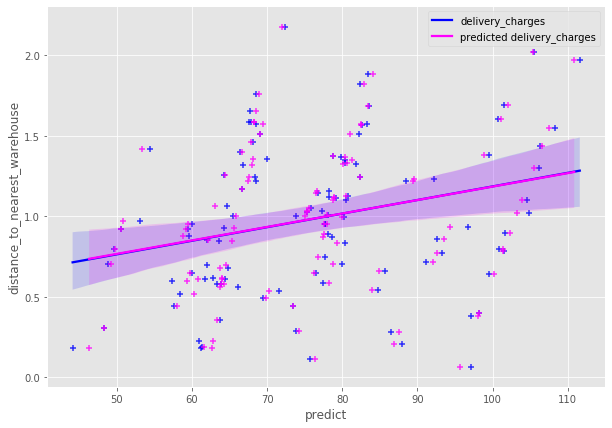

In [644]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_predict.delivery_charges, y=df_predict.distance_to_nearest_warehouse, color='blue', marker='+')
sns.regplot(x=df_predict.predict, y=df_predict.distance_to_nearest_warehouse, color='magenta', marker='+')
plt.legend(labels=['delivery_charges', 'predicted delivery_charges'])

# Outliers fixing 3.1  <a class="anchor" id="sec3.1"></a>

* We will read "28130006_outlier_data.csv" file from pandas 

In [645]:
outlier = pd.read_csv("28130006_outlier_data.csv")

In [646]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

## EDA with visualization 3.2  <a class="anchor" id="sec3.2"></a>

* With the describe function we will see the numerical variable and the catagerical variable.
- we can see the max for delivery chargers is 143 and min is 26 
- we can also see the max for order_price is 46060  
- The distance is 0.06 for distance to nearest warehouse  which is very low 



In [647]:
outlier.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    500.00000        500.000000    500.000000     500.000000   
mean   14119.36000         76.835090    -37.812532     144.967078   
std     8033.48114         16.877721      0.007797       0.021080   
min      580.00000         26.605000    -37.835050     144.924247   
25%     8055.00000         66.260000    -37.818918     144.951361   
50%    13025.00000         76.475000    -37.812960     144.965135   
75%    20005.00000         83.520000    -37.806334     144.981831   
max    46060.00000        143.745000    -37.796004     145.018654   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       500.000000    500.000000                     500.000000  
mean         11.240000  12584.152590                       1.075108  
std           8.573763   7211.556753                       0.483435  
min           0.000000    518.590000                       0.065600  
25%           5.000000   7066.022500                       0.711925  
50%          10.000000  11475.560000                       1.058950  
75%          15.000000  17364.395000                       1.380775  
max          25.000000  38119.320000                       2.675900

In [648]:
outlier.describe(include=['O'])

order_id   customer_id        date nearest_warehouse  \
count         500           500         500               500   
unique        500           496         273                 3   
top     ORD202564  ID1833120520  2019-06-01          Thompson   
freq            1             2           5               205   

                                  shopping_cart  season  \
count                                       500     500   
unique                                      467       4   
top     [('Alcon 10', 2), ('Universe Note', 2)]  Summer   
freq                                          3     134   

                                   latest_customer_review  
count                                                 500  
unique                                                500  
top     perfect everything was perfect except it didn'...  
freq                                                    1

## Investigating outliers with histogram plot 3.3  <a class="anchor" id="sec3.3"></a>

* From our plot we are able to see that the histogram for delivert_charges is skewed to the left. 
* This is also the case for order_price as it is also skewed to the left.
* We can see the outliers from this histogram as 140 they are going out the curve. 


In [649]:
from scipy.stats import norm
plt.hist(outlier.delivery_charges, bins=10, rwidth=0.8, density=True)
plt.xlabel('delivery_charges')
plt.ylabel('Count')

rng = np.arange(outlier.delivery_charges.min(), outlier.delivery_charges.max(), 0.1)
plt.plot(rng, norm.pdf(rng,outlier.delivery_charges.mean(),outlier.delivery_charges.std()))

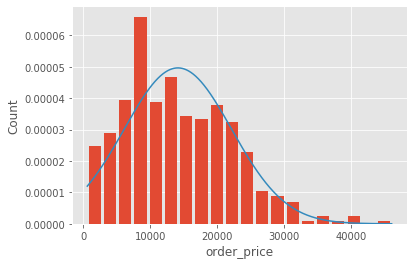

In [650]:
plt.hist(outlier.order_price, bins=20, rwidth=0.8, density=True)
plt.xlabel('order_price')
plt.ylabel('Count')

rng = np.arange(outlier.order_price.min(), outlier.order_price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,outlier.order_price.mean(),outlier.order_price.std()))


### Detecting outliers using scatterplot 3.4  <a class="anchor" id="sec3.4"></a> 

* We can create a scatterplot with respect to order_price and deliver_charges 
* We can see the ouliers for delivery charges is around 120-140 and below 30-40
* Outlier found for order_price is above 35000 

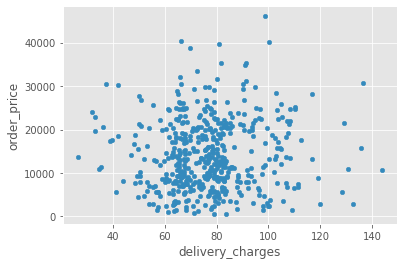

In [651]:
outlier.plot.scatter(x='delivery_charges', y='order_price')



##### Scatterplot with respect to distance_to_warehouse and deliver_charges

* Again we can see outliers above 140 for deliver_chargers 
* along with outliers above 2.5 in distance_to_warehouse 

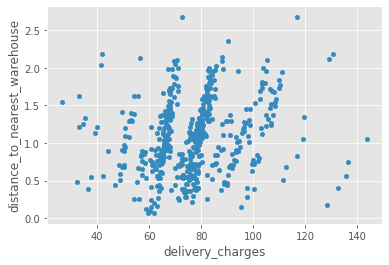

In [652]:
outlier.plot.scatter(x='delivery_charges', y='distance_to_nearest_warehouse')



* We will group by expidited_delivery 
- delivery charges is dependent on expedited deliver so we need to analyse it. 
* from this box plot we can see there is outliers for both false and true 
- with 140+ delivery charges belonging to expedited delivery 

### Detecting outliers using Boxplot 3.5  <a class="anchor" id="sec3.5"></a>

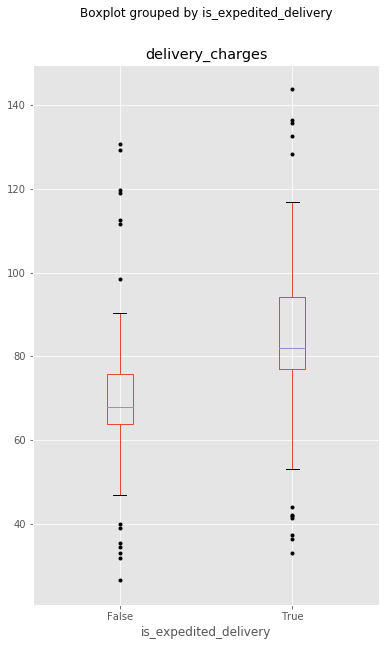

In [653]:
outlier.boxplot('delivery_charges',by='is_expedited_delivery',sym='k.', figsize=(6, 10))



#### Delivery_charges with respect to season 
* A box plot showing outliers based on season 
* Summer having the most outliers with above 120 delivery charges
 * The minimum is found in August which is less than 40

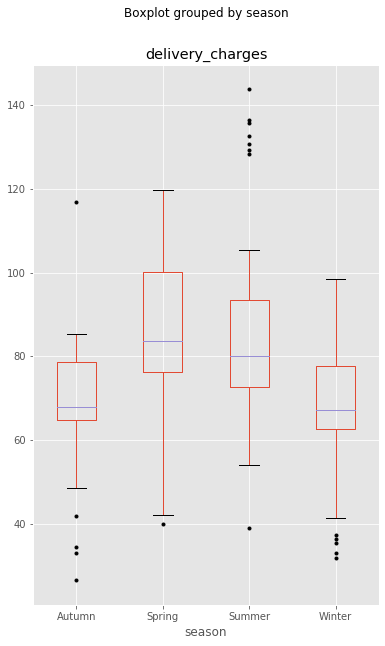

In [654]:
outlier.boxplot('delivery_charges',by='season',sym='k.', figsize=(6, 10))



## Group by Analysis 3.6  <a class="anchor" id="sec3.6"></a>
* Grouping nearest_warehouse and season 
* This will help analyse our data 


In [655]:
group_dict={"order_price":["mean","max","min","median","quantile"],
            "delivery_charges": ["mean","max","min","median"], 
            "distance_to_nearest_warehouse":["mean","max","min","median"],
            "is_expedited_delivery":["sum","count"],
            "is_happy_customer":["sum","count"]}


In [656]:
outlier.groupby('nearest_warehouse',as_index=False).agg(group_dict)



nearest_warehouse   order_price                               \
                             mean    max   min median quantile   
0            Bakers  14777.948718  35270   580  13480  13480.0   
1         Nickolson  14230.280899  46060   730  12595  12595.0   
2          Thompson  13647.170732  40390  1010  12850  12850.0   

  delivery_charges                          distance_to_nearest_warehouse  \
              mean      max     min  median                          mean   
0        75.003675  116.750  32.030  75.750                      1.189864   
1        78.268006  143.745  33.165  76.465                      0.994501   
2        76.636146  135.735  26.605  77.030                      1.079603   

                           is_expedited_delivery       is_happy_customer        
      max     min   median                   sum count               sum count  
0  2.6759  0.0715  1.18010                  50.0   117              91.0   117  
1  2.1832  0.0656  0.91055                  91.0   178             137.0   178  
2  2.1325  0.1246  1.07340                 109.0   205             144.0   205

In [657]:
outlier.groupby('season',as_index=False).agg(group_dict)

season   order_price                                delivery_charges  \
                   mean    max   min   median quantile             mean   
0  Autumn  13939.531250  39590  1160  13002.5  13002.5        68.980156   
1  Spring  14731.900826  40020   580  13430.0  13430.0        86.052314   
2  Summer  14262.798507  46060   580  12382.5  12382.5        83.622612   
3  Winter  13518.333333  40390  1010  12640.0  12640.0        68.122436   

                          distance_to_nearest_warehouse                  \
       max     min median                          mean     max     min   
0  116.865  26.605  67.83                      1.126406  2.6759  0.0715   
1  119.670  39.930  83.59                      1.118328  2.6759  0.1433   
2  143.745  39.030  80.23                      1.078477  2.1808  0.1766   
3   98.520  32.030  67.23                      0.970430  2.0406  0.0656   

           is_expedited_delivery       is_happy_customer        
    median                   sum count               sum count  
0  1.11100                  62.0   128              97.0   128  
1  1.14680                  55.0   121              88.0   121  
2  1.05355                  68.0   134              94.0   134  
3  0.91520                  65.0   117              93.0   117

## Removing outliers 3.7 <a class="anchor" id="sec3.7"></a>
* We will create a function which will remove outliers 
* This function will use mean, standard deviation for delivery charges 


In [658]:
def remove_mean_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('season'):
        m = np.mean(subdf.delivery_charges)
        st = np.std(subdf.delivery_charges)
        reduced_df = subdf[(subdf.delivery_charges>(m-st)) & (subdf.delivery_charges<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

* Creating new dataframe called "df1" and using remove_mean_outlier function to remove outliers from outlier data frame. 


In [659]:
df1 = remove_mean_outliers(outlier)
df1.shape

(362, 16)

* The outliers in delivery charges groupby season have been removed as shown with the boxplot below  

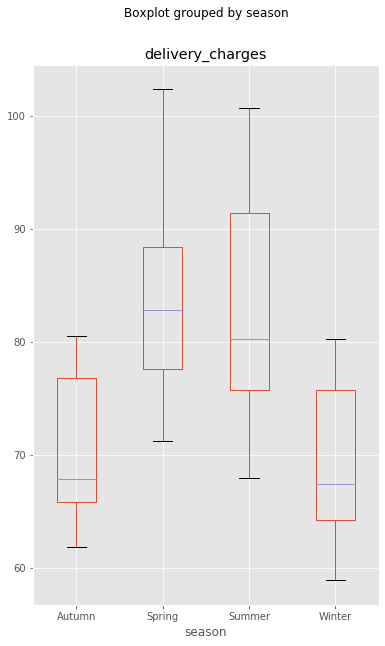

In [660]:
df1.boxplot('delivery_charges',by='season',sym='k.', figsize=(6, 10))


* The histogram of delivery charges with outliers removed. 
* Now the histogram is skewed more towards the center as before with outliers it was skewed to the left. 

In [661]:
plt.hist(df1.delivery_charges, bins=10, rwidth=0.8, density=True)
plt.xlabel('delivery_charges')
plt.ylabel('Count')

rng = np.arange(df1.delivery_charges.min(), df1.delivery_charges.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df1.delivery_charges.mean(),df1.delivery_charges.std()))


*  Boxplot  of order_price and season for df1 
* As you can see there are outliers in all the seasons which are all above 35000 

In [662]:
df1.boxplot('order_price',by='season',sym='k.', figsize=(6, 10))


* This will show df1 with values below 35000 for order_price

In [663]:
df2= df1[(df1.order_price<=35000)]
df2.shape

(357, 16)

* **Now outliers have been removed for order_price**

In [664]:
df2.boxplot('order_price',by='season',sym='k.', figsize=(6, 10))

In [665]:
df2.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    357.000000        357.000000    357.000000     357.000000   
mean   13648.725490         76.401289    -37.812941     144.966299   
std     7462.006048         10.103429      0.007236       0.020395   
min      580.000000         58.880000    -37.835050     144.924247   
25%     8130.000000         67.800000    -37.818804     144.950883   
50%    12635.000000         76.160000    -37.813124     144.964129   
75%    19580.000000         81.910000    -37.807125     144.980206   
max    34880.000000        102.380000    -37.796004     145.018654   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       357.000000    357.000000                     357.000000  
mean         11.302521  12195.029440                       0.989720  
std           8.383258   6851.808663                       0.451845  
min           0.000000    518.590000                       0.065600  
25%           5.000000   7127.530000                       0.682700  
50%          10.000000  10856.510000                       0.963200  
75%          15.000000  17127.820000                       1.267200  
max          25.000000  34971.040000                       2.675900

* The outliers for distance to nearest warehouse are all above 2.14 
* The maximum value for distance to nearest warehouse is 2.67
* The average is 0.98
* We can look at where these points are in our data frame with the function below. 



In [666]:
df2[df2.distance_to_nearest_warehouse>2.14]

order_id   customer_id        date nearest_warehouse  \
80   ORD484738  ID2184616698  2019-03-18            Bakers   
164  ORD347441  ID0282854647  2019-09-21            Bakers   
168  ORD114637  ID0343337614  2019-10-26         Nickolson   

                                         shopping_cart  order_price  \
80   [('Olivia x460', 1), ('pearTV', 2), ('Thunder ...        18205   
164  [('iStream', 1), ('Alcon 10', 2), ('iAssist Li...        26820   
168          [('Lucent 330S', 2), ('Thunder line', 2)]         6820   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
80              72.69    -37.826194     145.017716               10   
164             90.46    -37.799722     145.018654               15   
168             88.02    -37.799311     144.968292               25   

     order_total  season  is_expedited_delivery  \
80      16457.19  Autumn                  False   
164     22887.46  Spring                  False   
168      5203.02  Spring                  False   

     distance_to_nearest_warehouse  \
80                          2.6759   
164                         2.3562   
168                         2.1495   

                                latest_customer_review  is_happy_customer  
80   i love the size and portability of this. keeps...               True  
164  olivia a157v (at&t) i needed a simple non-smar...               True  
168                               perfect gift love it               True

* We are able to see the outliers visually through a boxplot 
* This can be groupby nearest_warhouse
* With Bakers and Nickolson containing outliers

In [667]:
df2.boxplot('distance_to_nearest_warehouse',by='nearest_warehouse',sym='k.', figsize=(6, 10))

* when disteance to nearest warehouse is less than 0.1 to show our minimum values 

In [668]:
df2[df2.distance_to_nearest_warehouse<0.1]


order_id   customer_id        date nearest_warehouse  \
89   ORD060130  ID4110787845  2019-03-22            Bakers   
285  ORD386114  ID0247417570  2019-08-07         Nickolson   
350  ORD345971  ID0247417838  2019-06-30         Nickolson   

                                         shopping_cart  order_price  \
89   [('Olivia x460', 2), ('Toshika 750', 2), ('pea...        18260   
285  [('Alcon 10', 1), ('Toshika 750', 2), ('Lucent...        20050   
350  [('Universe Note', 1), ('Olivia x460', 2), ('C...        12640   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
89              61.83    -37.810080     144.996038               25   
285             60.46    -37.817724     144.969572               10   
350             59.60    -37.818105     144.969136               15   

     order_total  season  is_expedited_delivery  \
89      13756.83  Autumn                  False   
285     18105.46  Winter                  False   
350     10803.60  Winter                  False   

     distance_to_nearest_warehouse  \
89                          0.0715   
285                         0.0970   
350                         0.0656   

                                latest_customer_review  is_happy_customer  
89   great phone i am very happy with the speed, po...               True  
285  great product. i have two and may want to buy ...               True  
350  very happy! happy! overall very happy with pho...               True

* Creating new dataframe "df3" showing distance to nearest warehouse when it is less than 2.14 
* This will exclude the outliers that were above 2.14

In [669]:
df3=df2[df2.distance_to_nearest_warehouse<2.14]
df3.shape

(354, 16)

* Now you can see the maximum value for distance to nearest warehouse is 2.1 and the mean is 0.97

In [670]:
df3.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    354.000000        354.000000    354.000000     354.000000   
mean   13617.937853         76.339237    -37.812980     144.966000   
std     7447.914902         10.097604      0.007162       0.020103   
min      580.000000         58.880000    -37.835050     144.924247   
25%     8131.250000         67.770000    -37.818790     144.950835   
50%    12607.500000         76.120000    -37.813126     144.964032   
75%    19553.750000         81.697500    -37.807336     144.979744   
max    34880.000000        102.380000    -37.796004     145.013379   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       354.000000    354.000000                     354.000000  
mean         11.257062  12172.536271                       0.977821  
std           8.384460   6843.385796                       0.434284  
min           0.000000    518.590000                       0.065600  
25%           5.000000   7139.737500                       0.677150  
50%          10.000000  10830.055000                       0.954100  
75%          15.000000  17126.347500                       1.264375  
max          25.000000  34971.040000                       2.109800

* Creating a scatterplot for df3 - with respect to season, delivery charger and is_customer_happy 

In [671]:
sns.catplot(data=df3, x="season", y="delivery_charges", hue="is_happy_customer",kind="swarm")


* When expedited_delivery is TRUE then the delivery charges will mostly be above the graph whereas when expedited delivery is FALSE the delivery_charges will be below the graph 

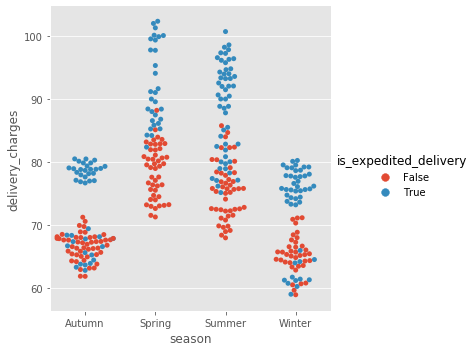

In [672]:
sns.catplot(data=df3, x="season", y="delivery_charges", hue="is_expedited_delivery",kind="swarm")


* Scatterplot with respect to season, distance to nearest warehouse and is expedited delivery 
* In autumn you are able to see a few outliers above 1.75 and below 0.25 delivery charges 
* In winter you are able to see outliers above 1.60 
* In spring you are able to see outliers above 1.80 

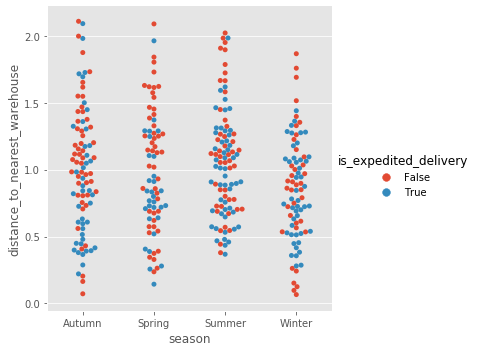

In [673]:
sns.catplot(data=df3, x="season", y="distance_to_nearest_warehouse", hue="is_expedited_delivery",kind="swarm")


* Scatterplot with respect to season, distance to nearest warehouse, and hue as  nearest_warehouse 
* There are a few outliers seen in similar spots as mentioned above with hue of is_expedited deliver 

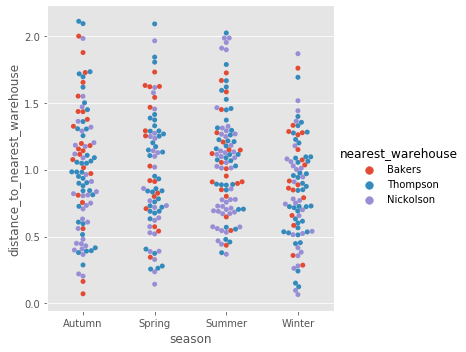

In [674]:
sns.catplot(data=df3, x="season", y="distance_to_nearest_warehouse", hue="nearest_warehouse",kind="swarm")


* Scatterplot of season, order_price with hue of nearest warehouse 
* The outliers are shown above 30000 order_price with majority of nearest_warehouse in between 25000 and 1000

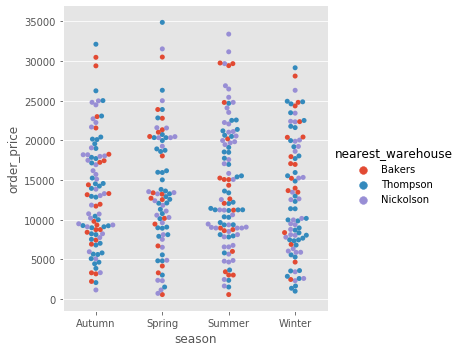

In [675]:
sns.catplot(data=df3, x="season", y="order_price", hue="nearest_warehouse",kind="swarm")


* Showing outlier of order_price groupby nearest warehouse. 
* Outlier found in Thompson with 35000 order price. 

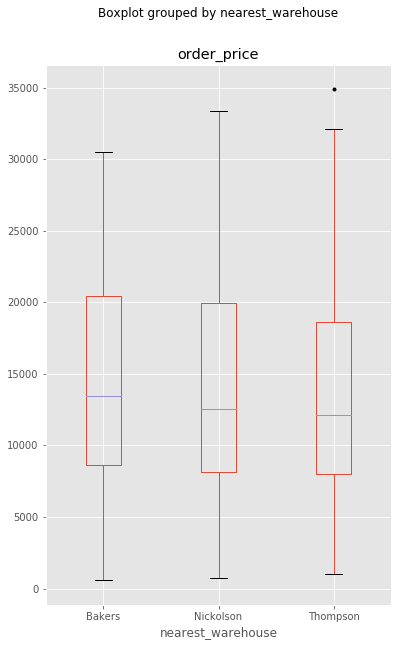

In [676]:
df2.boxplot('order_price',by='nearest_warehouse',sym='k.', figsize=(6, 10))


* Showing rows when order_price is greater than 33000 
* The outlier we found previously had a delivert charge of 91 this could be the reason why it has such a high order price.

In [677]:
df3[df3.order_price>33000]

order_id   customer_id        date nearest_warehouse  \
119  ORD418966  ID0777831467  2019-11-25          Thompson   
191  ORD441519  ID2279153639  2019-01-15         Nickolson   

                                         shopping_cart  order_price  \
119  [('Thunder line', 2), ('Alcon 10', 2), ('pearT...        34880   
191  [('Candle Inferno', 1), ('pearTV', 2), ('Alcon...        33400   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
119             91.04    -37.803951     144.958090                0   
191             72.47    -37.812341     144.973448               15   

     order_total  season  is_expedited_delivery  \
119     34971.04  Spring                   True   
191     28462.47  Summer                  False   

     distance_to_nearest_warehouse  \
119                         1.3719   
191                         0.7759   

                                latest_customer_review  is_happy_customer  
119  international model- will noy work on verizon ...              False  
191  sexy and slim device stopped by my flight atte...               True

* Removing outlier by creating another dataframe "df4" 
* when order price is less than 34000 

In [678]:
df4=df3[df3.order_price<34000]
df4.shape

(353, 16)

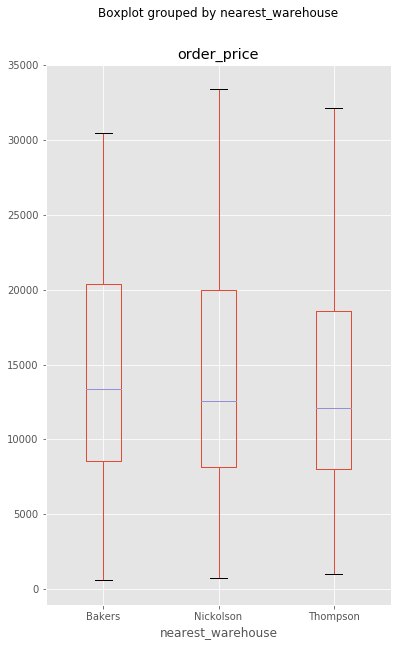

In [679]:
df4.boxplot('order_price',by='nearest_warehouse',sym='k.', figsize=(6, 10))


In [680]:
df4.describe()

order_price  delivery_charges  customer_lat  customer_long  \
count    353.000000        353.000000    353.000000     353.000000   
mean   13557.705382         76.297592    -37.813005     144.966022   
std     7371.640431         10.081447      0.007156       0.020127   
min      580.000000         58.880000    -37.835050     144.924247   
25%     8130.000000         67.760000    -37.818804     144.950819   
50%    12580.000000         76.080000    -37.813127     144.964050   
75%    19475.000000         81.090000    -37.807347     144.979900   
max    33400.000000        102.380000    -37.796004     145.013379   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       353.000000    353.000000                     353.000000  
mean         11.288952  12107.951275                       0.976705  
std           8.374835   6744.195058                       0.434391  
min           0.000000    518.590000                       0.065600  
25%           5.000000   7127.530000                       0.675300  
50%          10.000000  10803.600000                       0.952300  
75%          15.000000  17121.930000                       1.261000  
max          25.000000  30584.540000                       2.109800

In [681]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 361
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       353 non-null    object 
 1   customer_id                    353 non-null    object 
 2   date                           353 non-null    object 
 3   nearest_warehouse              353 non-null    object 
 4   shopping_cart                  353 non-null    object 
 5   order_price                    353 non-null    int64  
 6   delivery_charges               353 non-null    float64
 7   customer_lat                   353 non-null    float64
 8   customer_long                  353 non-null    float64
 9   coupon_discount                353 non-null    int64  
 10  order_total                    353 non-null    float64
 11  season                         353 non-null    object 
 12  is_expedited_delivery          353 non-null    boo

## SAVED FILE  3.8 <a class="anchor" id="sec3.8"></a>
**All outliers have been removed**

In [682]:
df4.to_csv('28130006_outlier_data_solution.csv',index=False)